# Programming with Python MOD007891 
## Assessment Element 010 ( Weighting = 100% )
### NAME: Ohioze Alex Omiunu
### STUDENT ID: 2296154


# Section 1:  ( Analysis of Diabetic Patient Data ) - ( Weighting = 30% )

This dataset is originally from the **National Institute of Diabetes and Digestive and Kidney Diseases.** The dataset consist of several medical predictor **(independent)** variables and one target **(dependent)** variable, Outcome. 

Independent variables include:

- Number of times pregnant.
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
- Diastolic blood pressure (mm Hg).
- Triceps skinfold thickness (mm).
- Two-Hour serum insulin (mu U/ml).
- Body mass index (weight in kg/(height in m)^2).
- Diabetes pedigree function.
- Age (years).
- Outcome: Class variable (0 or 1).


### Upload the provided dataset (diabetes.csv) into your Jupyter Notebook working directory and then complete the following tasks.  

In [238]:
# import all neccesary libaries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Dataset/diabetes.csv")

In [40]:
# the "head" method is used to view the first 5 row
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 1. Identify the total number of records? 

In [41]:
# Used the first element in the shape list to view the total number of records
print("Number of records:", df.shape[0])



Number of records: 768


### 2. Display data types for all columns? 

In [42]:
# use the dtypes to view all data types in the data frame
df.dtypes


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### 3.  Check the dataset for the missing values? 

In [43]:
# use the isnull method to check for missing values in the dataset
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 4. Display descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset such as total count, min, max, standard deviation, max and quartiles?

In [44]:
# use the describe method to display the descriptive statistics in a dataframe
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


As you probably have noticed, many columns have a **minimum value of 0** which is clearly not logical. Those are essentially **missing values** in our dataset. 



### 5. Identify columns with missing values and find out their frequency? 

In [45]:
# Exclude "Outcome" and "Pregnancies" columns from the check because the zeros are meaningful
columns_to_ignore = ["Outcome", "Pregnancies"]
missing_values = (df.drop(columns=columns_to_ignore) == 0).sum()

# Display columns with a minimum value of 0
print("Columns with a missing values:")
print(missing_values)

Columns with a missing values:
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


### 6. Identify the number of positive and negative patients based on target (dependent) variable, outcome? Plot the frequencies using a bar chart?

Outcome
0    500
1    268
Name: count, dtype: int64


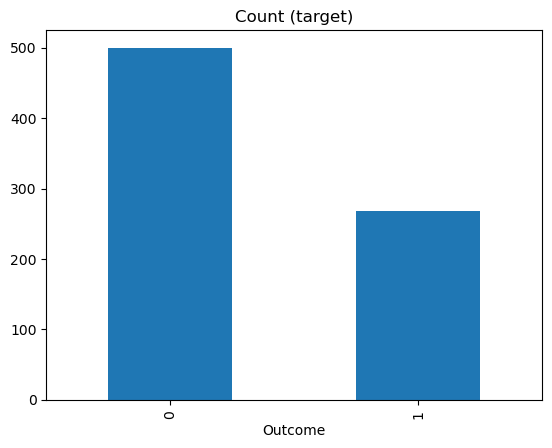

In [46]:
# Count of positive and negative outcomes
outcome_counts = df['Outcome'].value_counts()
print(outcome_counts)
# Plot thr outcome counts
outcome_counts.plot(kind='bar', title='Count (target)');


### 7. Display correlation among all dependent and independent variables using the correlation matrix? Illustrate correlation data using a heatmap plot?  

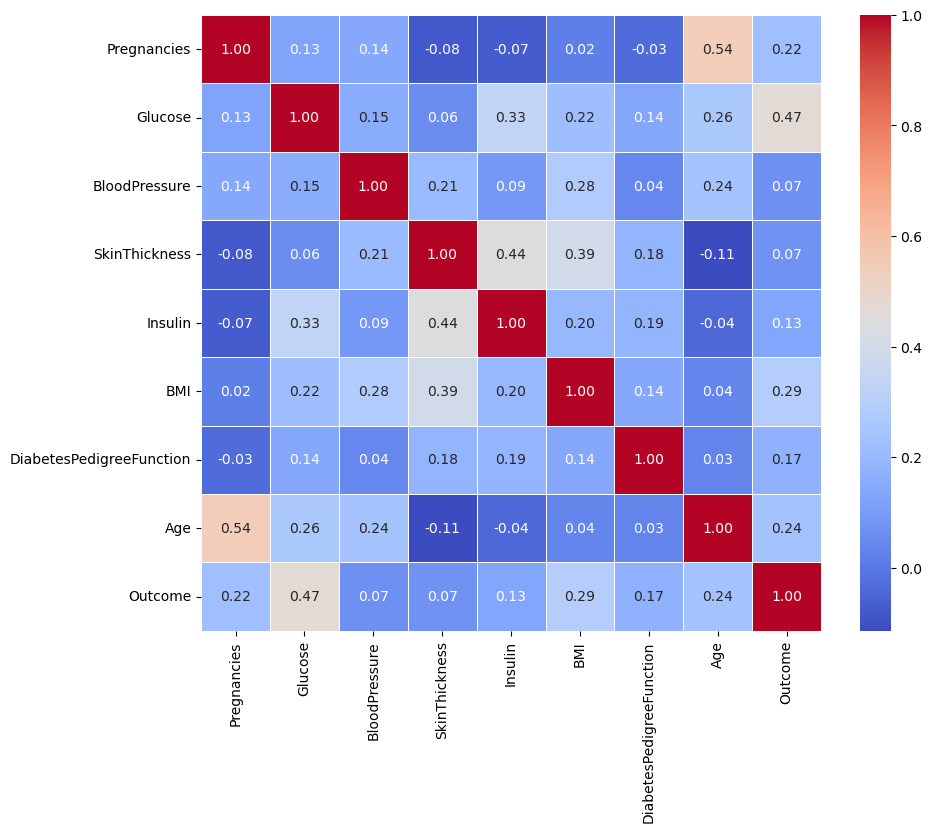

In [47]:

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set the size of the plot
plt.figure(figsize=(10, 8))

# Plot the heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Show the plot
plt.show()

We have observed earlier that missing values in this dataset are represented by 0. This is clearly not a good practice and negatively impacts our data analysis. 



### 8. Replace these zero values with NAN?

In [48]:
# Replace all occurrences of 0 with NaN in selected columns
replaced_columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age", "DiabetesPedigreeFunction"]
df[replaced_columns] = df[replaced_columns].replace({0: np.nan})

# Display the DataFrame after replacement
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


### 9. Check out the variables for 0 value once again?  

In [49]:
# Columns to be ignored during the missing values calculation
columns_to_ignore = ["Outcome", "Pregnancies"]

# Exclude specified columns and count the occurrences of 0
missing_values = (df.drop(columns=columns_to_ignore) == 0).sum()

# Display the count of missing values
missing_values

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

### 10. Check out the missing values counts per variable?

In [50]:
# use isna method to check for missing values in the dataframe
df.isna().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### 11. Identify the mean value for each variable? 

In [51]:
# use mean method method to check for the mean for each variable in the data frame

df.mean()

Pregnancies                   3.845052
Glucose                     121.686763
BloodPressure                72.405184
SkinThickness                29.153420
Insulin                     155.548223
BMI                          32.457464
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

### 12. For the following columns, fill missing values with mean column values?  
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI

In [52]:
# use the fillna method to replace the empty values with the mean in each column with empty values
df.fillna( {'Glucose': df['Glucose'].mean(), 'BloodPressure': df['BloodPressure'].mean(), 'SkinThickness': df['SkinThickness'].mean(), 'Insulin': df['Insulin'].mean(), 'BMI': df['BMI'].mean()}, inplace = True)
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


### 13. Display descriptive statistics and checkout the min values of the aforementioned columns once again? Any ZEROS ? 

In [54]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### There are zeros in the outcome variable for min,Q1 and median.

### 15. Plot data distribution of each variable? Explain your thoughts 

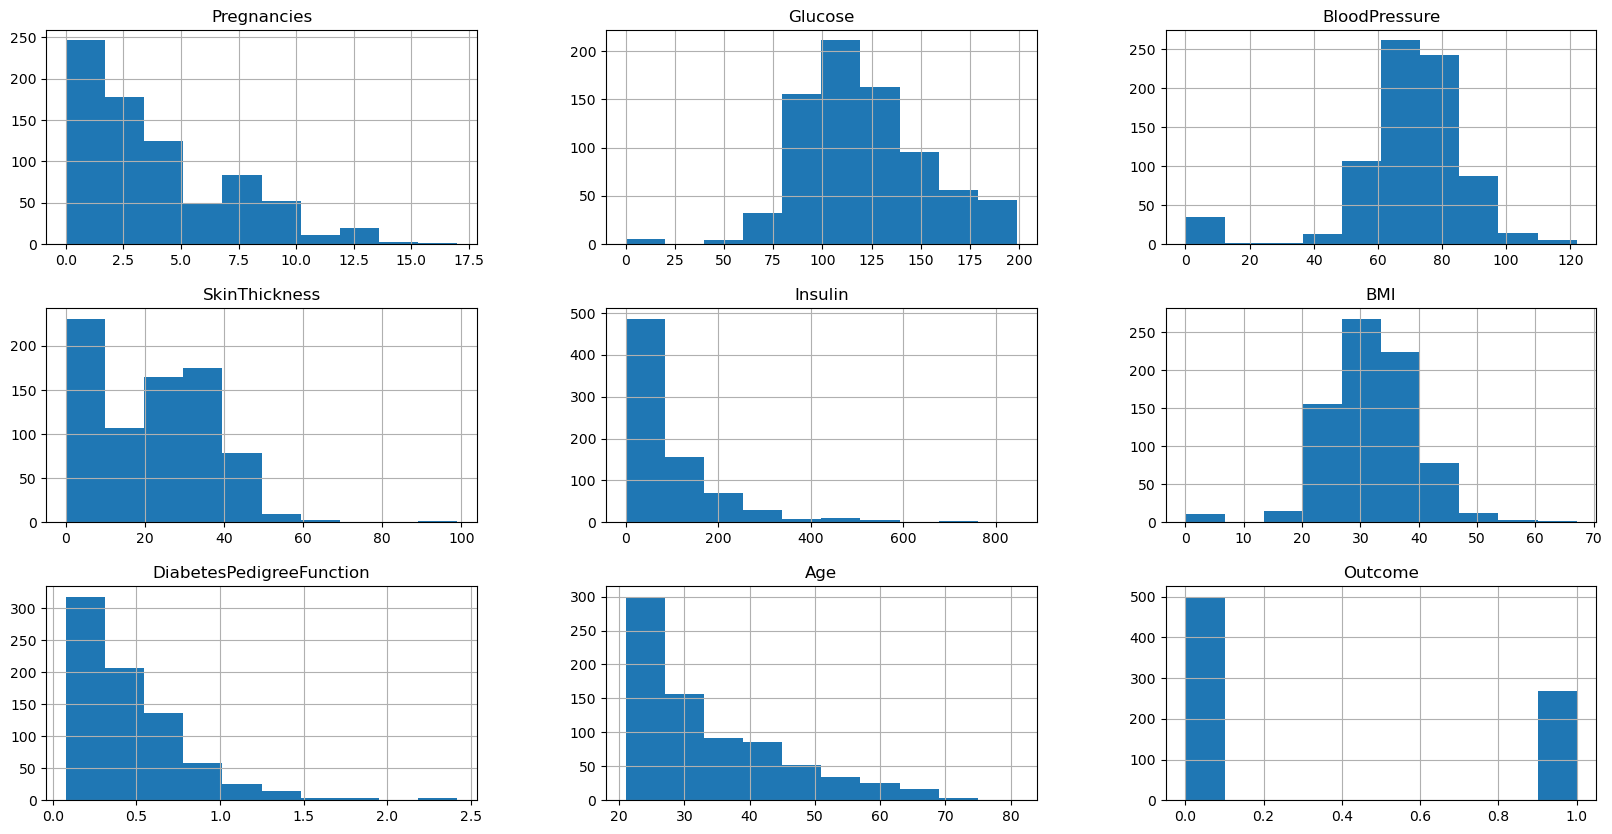

In [239]:
df.hist(figsize=(20, 10))
plt.show()


#### The distribution of pregnancies in this dataset is right-skewed, with a notable prevalence of women having zero pregnancies. The skewness indicates that a substantial portion of the dataset consists of individuals who have not been pregnant, and as the number of pregnancies increases, the frequency of individuals with higher pregnancy counts decreases. 
#### Glucose : On the dataset, more than 120 individuals exhibit a glucose level up to 120. This suggests that a significant portion of the population studied has a glucose concentration within a range considered normal or below a certain threshold.
#### A symmetrical histogram of blood pressure values suggests a balanced distribution of measurements around a central point. In this case, the symmetry implies that roughly an equal number of individuals exhibit blood pressure values above and below the central tendency. This balance in the distribution indicates that the data is evenly spread across a range of blood pressure values, with no significant skewness towards higher or lower readings. 
#### Skin Thickness is Right Skewed
#### The distribution of Body Mass Index (BMI) values in this dataset is symmetrical. This symmetry implies that individuals with BMIs above and below the central tendency are evenly distributed, contributing to a balanced representation of BMI values in the studied population.
#### Diabetes Pedigree Function is Right Skewed
#### The distribution of ages in this dataset is right-skewed, signifying that a significant proportion of individuals have lower ages. As age increases, the frequency of individuals decreases, with fewer occurrences of higher age values


A Boxplot is a method for graphically depicting groups of numerical data through their quartiles. 

### 16. Plot the Boxplot for each variable? interpret the diagrams 

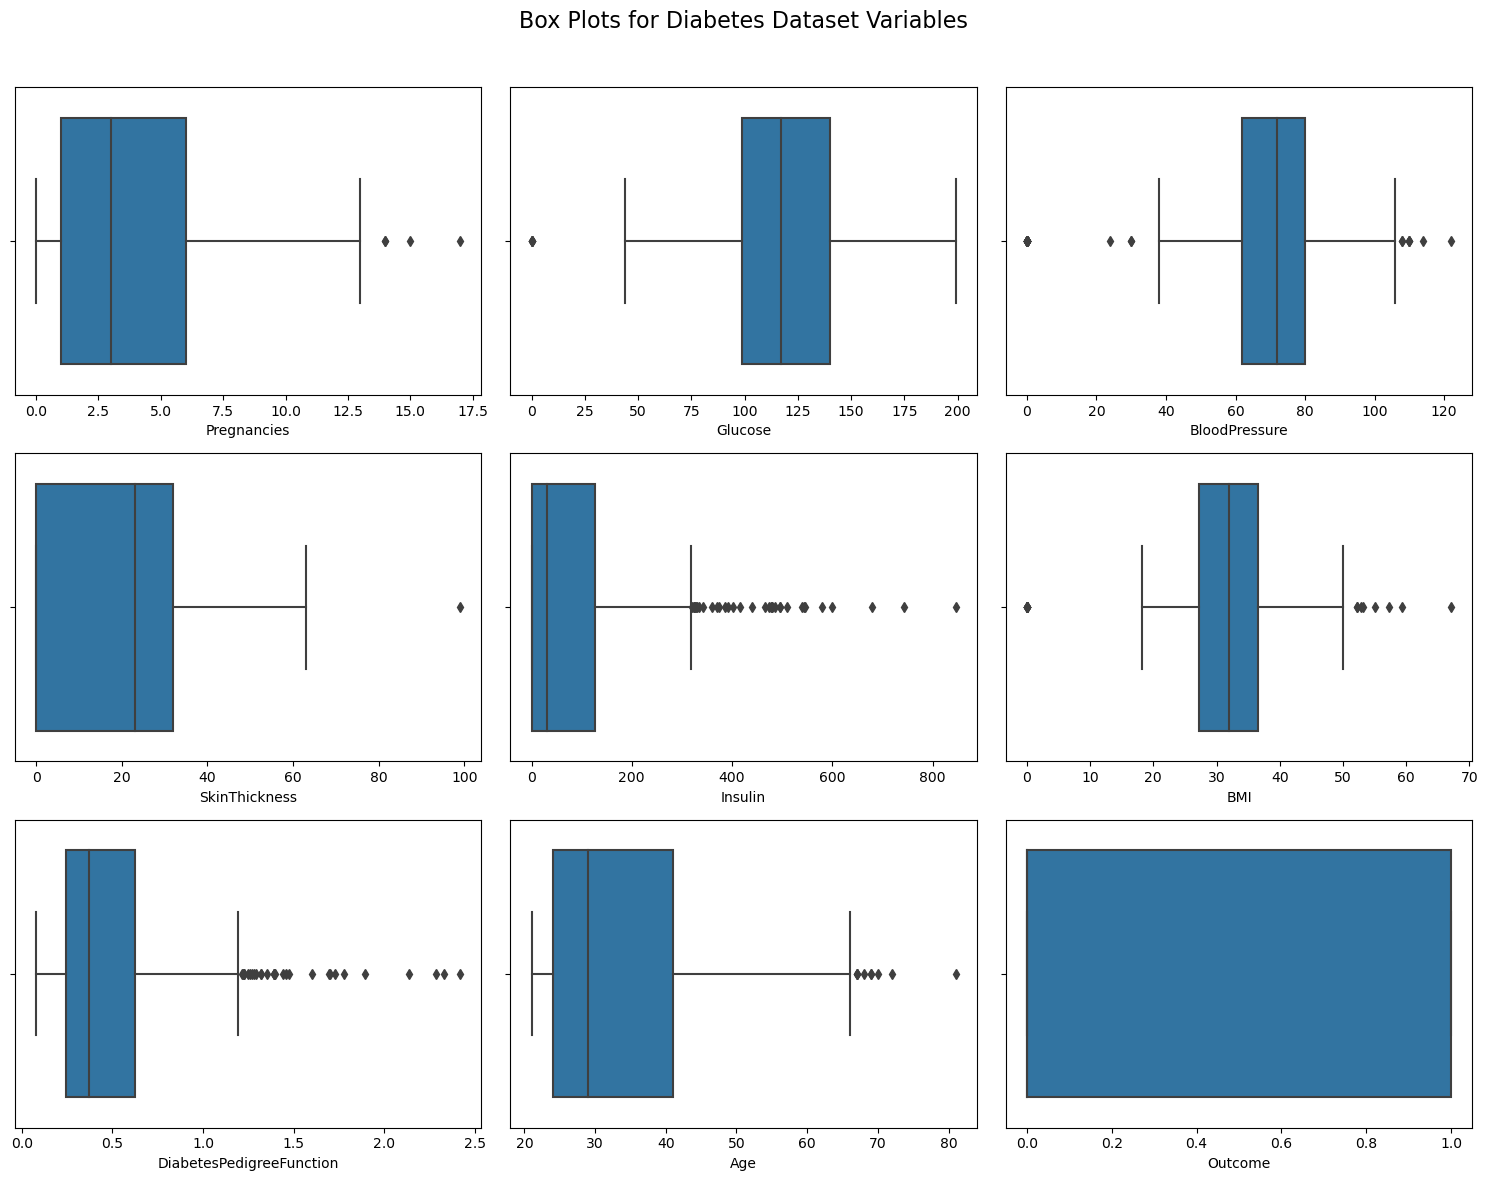

In [240]:


# Box plots for all variables
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle('Box Plots for Diabetes Dataset Variables', fontsize=16)

sns.boxplot(ax=axes[0, 0], x=df['Pregnancies'])
sns.boxplot(ax=axes[0, 1], x=df['Glucose'])
sns.boxplot(ax=axes[0, 2], x=df['BloodPressure'])
sns.boxplot(ax=axes[1, 0], x=df['SkinThickness'])
sns.boxplot(ax=axes[1, 1], x=df['Insulin'])
sns.boxplot(ax=axes[1, 2], x=df['BMI'])
sns.boxplot(ax=axes[2, 0], x=df['DiabetesPedigreeFunction'])
sns.boxplot(ax=axes[2, 1], x=df['Age'])
sns.boxplot(ax=axes[2, 2], x=df['Outcome'])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Pregnancies:
- The median number of pregnancies is around 3, with a significant number of outliers on the higher side.
- The interquartile range (IQR) spans from approximately 1 to 6 pregnancies.

### Glucose:
- The median glucose level is around 117, with a relatively narrow IQR.
- There are no outliers in the glucose distribution.

### BloodPressure:
- The median blood pressure is around 72, and the IQR spans from approximately 64 to 80.
- There are no outliers in the blood pressure distribution.

### SkinThickness:
- The median skin thickness is approximately 29.
- The distribution has a wide range, and there are potential outliers on the higher side.

### Insulin:
- The median insulin level is around 155, with a significant number of outliers on the higher side.
- The IQR is relatively narrow compared to the spread of the data.

### BMI (Body Mass Index):
- The median BMI is around 32.4, with a wide distribution and a few potential outliers on the higher side.

### DiabetesPedigreeFunction:
- The median value for the diabetes pedigree function is around 0.37.
- The distribution has a moderate spread, and there are a few potential outliers on the higher side.

### Age:
- The median age is around 29, with a relatively narrow IQR.
- There are a few potential outliers on the higher side of the age distribution.

### Outcome:
- Since Outcome is a binary variable (0 or 1), the box plot shows the distribution of outcomes.


### 17. Plot demographic and distribution of diabetics/nondiabetics across age variable?

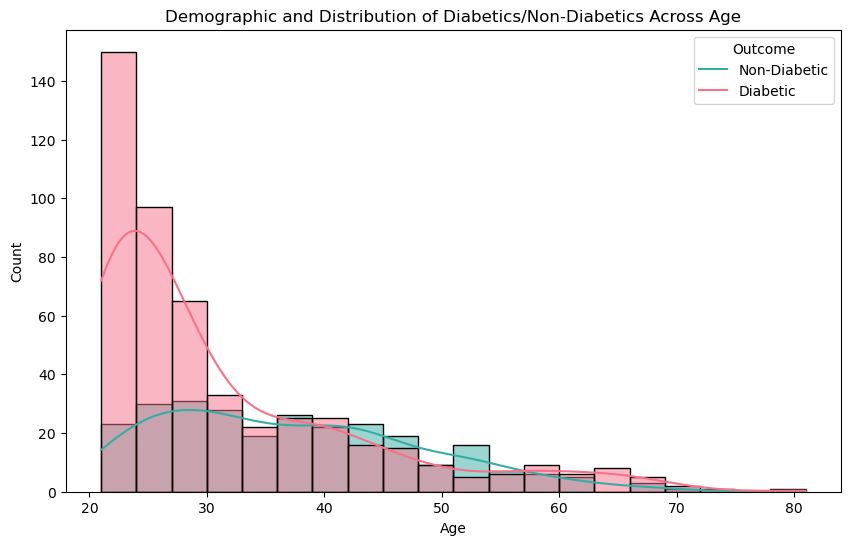

In [57]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Outcome', kde=True, bins=20, palette='husl')
plt.title('Demographic and Distribution of Diabetics/Non-Diabetics Across Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Outcome', labels=['Non-Diabetic', 'Diabetic'])
plt.show()

### 18. Investigate how the number of pregnancies impacts diabetes? Demonstrate the relationship with a plot. 

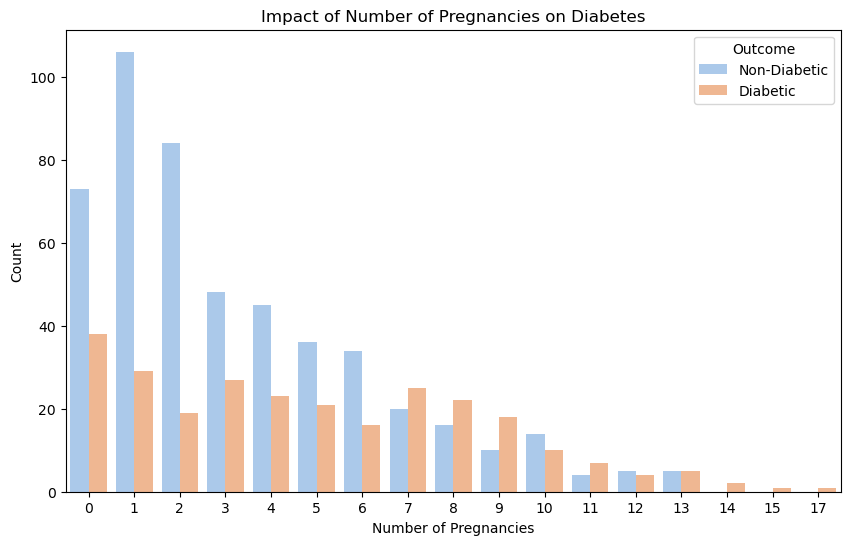

In [58]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Pregnancies', hue='Outcome', palette='pastel')
plt.title('Impact of Number of Pregnancies on Diabetes')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Count')
plt.legend(title='Outcome', labels=['Non-Diabetic', 'Diabetic'])
plt.show()

### 19. Check if there are any outliers in our dataset. Any data point outside 25% and 75% quarters can be considered an outlier. Remove the outliers from our dataset. 

In [59]:
# Identify outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define a mask to filter outliers
outlier_mask = ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

# To Remove the outliers from the dataset
df = df[outlier_mask]


print("New DataFrame size after Outlier removal:", df.shape)


New DataFrame size after Outlier removal: (515, 9)


### 20. Create a new categorical variable based on BMI using the following criteria. Name the new variable “BMI_tier” and add it to our dataset as a new column. 

- BMI = 0  then “NA”
- 0 < BMI < 18.5 then “Under Weight”
- 18.5 <= BMI < 25 then “Normal”
- 25 <= BMI < 30 then “Overweight” 
- 30 <= BMI then “Obese”


In [60]:
def categorize_bmi(bmi):
    if bmi == 0:
        return "NA"
    elif 0 < bmi < 18.5:
        return "Under Weight"
    elif 18.5 <= bmi < 25:
        return "Normal"
    elif 25 <= bmi < 30:
        return "Overweight"
    elif 30 <= bmi:
        return "Obese"

df["BMI_tier"]  = df['BMI'].apply(categorize_bmi)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_tier
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,Obese
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,Overweight
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,Normal
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,Overweight
5,5,116.0,74.0,29.15342,155.548223,25.6,0.201,30,0,Overweight
...,...,...,...,...,...,...,...,...,...,...
762,9,89.0,62.0,29.15342,155.548223,22.5,0.142,33,0,Normal
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0,Obese
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0,Overweight
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1,Obese


### 21. Plot the BMI_tier histogram ?  

<Axes: >

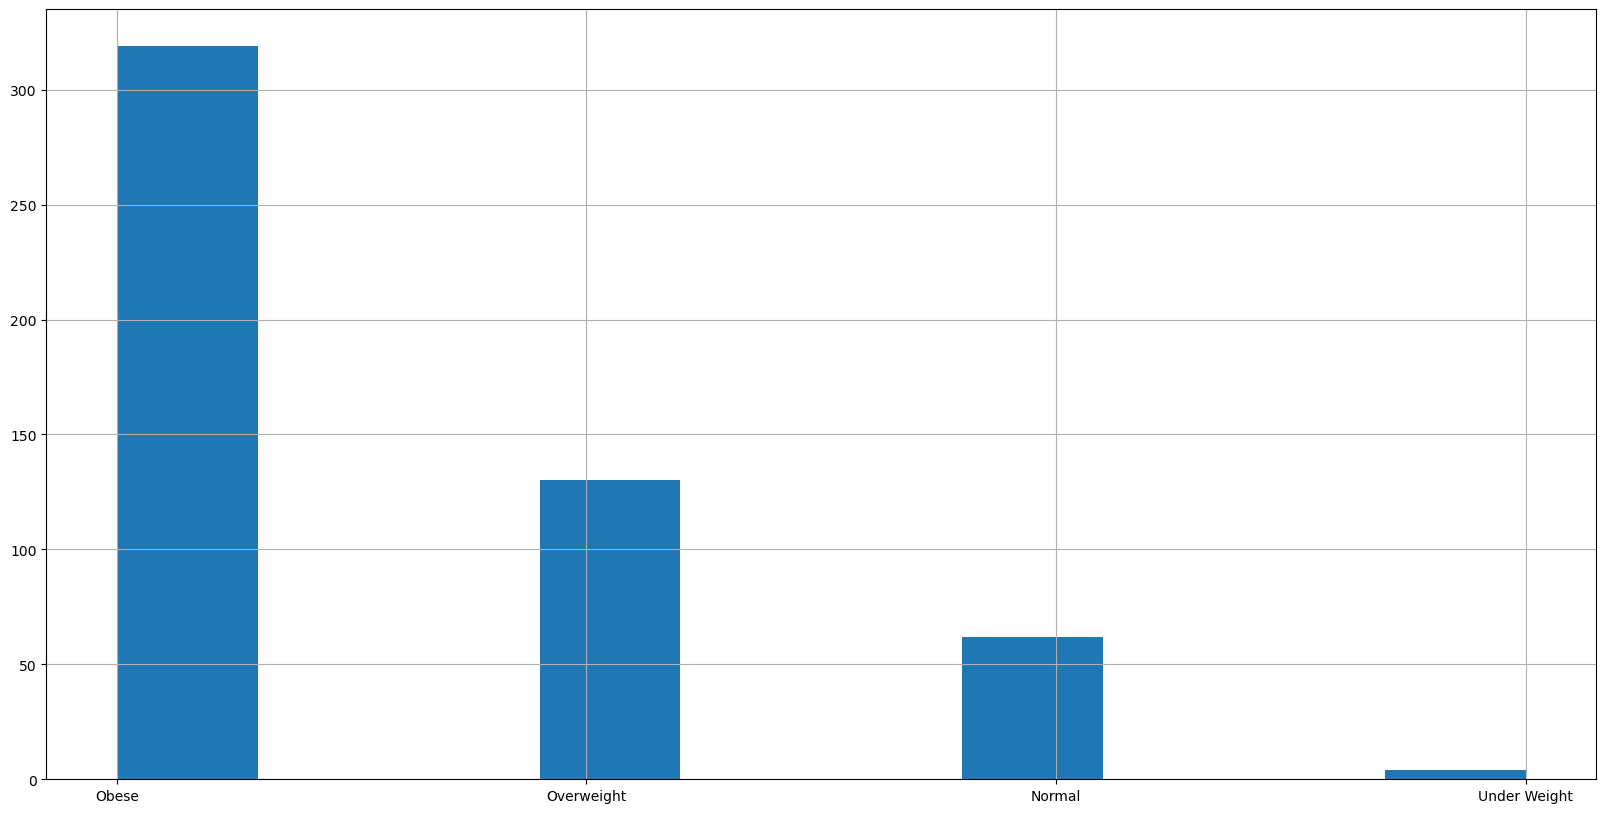

In [61]:
df["BMI_tier"].hist(figsize=(20, 10))

### 22. How many obese individuals exist in our dataset?  Use  Piechart to illustrate the proportion of each BMI tier? 

Number of Obese Individuals: 319


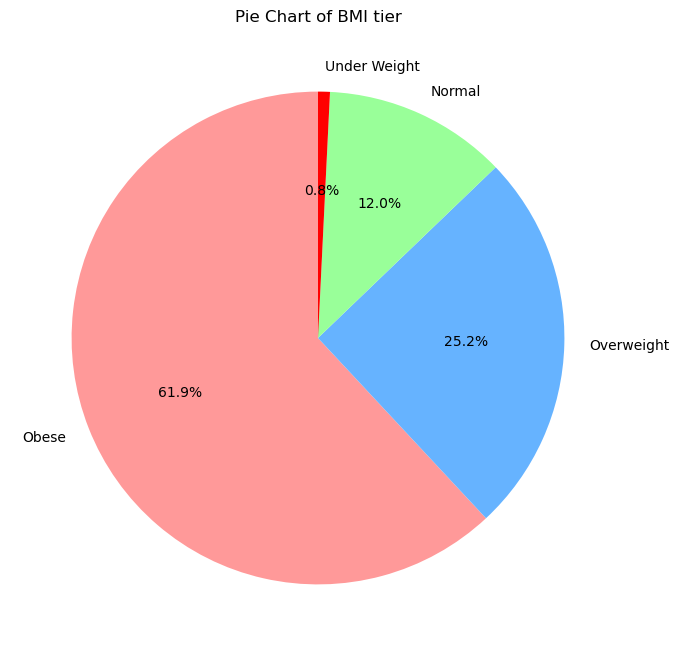

In [62]:

category_counts = df['BMI_tier'].value_counts()
obese_count = (df['BMI_tier'] == 'Obese').sum()
print("Number of Obese Individuals:",obese_count)
plt.figure(figsize=(8, 8))
category_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99', "#FF0000"])
plt.title('Pie Chart of BMI tier')
plt.ylabel('') 
plt.show()


### 23. Create a new categorical variable based on Oral Glucose Tolerance Test (Glucose) using the following criteria, suggested by DIABETES UK. Name the new variable “OGTT_tier” and add it to our dataset as a new column. 

- Glucose == 0 then “NA”
- Glucose < 140 then “Normal”
- 140 <= Glucose < 198 then “Impaired Glucose Tolerance”
- 198 <= Glucose then “Diabetic Level”


In [63]:
def categorize_ogtt(glucose):
    if glucose == 0:
        return "NA"
    elif glucose < 140:
        return "Normal"
    elif 140 <= glucose < 198:
        return "Impaired Glucose Tolerance"
    elif 198 <= glucose:
        return "Diabetic Level"

# Apply the function to create 'OGTT_tier'
df['OGTT_tier'] = df['Glucose'].apply(categorize_ogtt)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_tier,OGTT_tier
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,Obese,Impaired Glucose Tolerance
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,Overweight,Normal
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,Normal,Impaired Glucose Tolerance
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,Overweight,Normal
5,5,116.0,74.0,29.15342,155.548223,25.6,0.201,30,0,Overweight,Normal


### 24.How many individuals are categorized as “Diabetic Level” in our newly created variable, “OGTT_tier”?  Plot the “OGTT_tier” histogram?   

Number of Diabetic Individuals: 0


<Axes: >

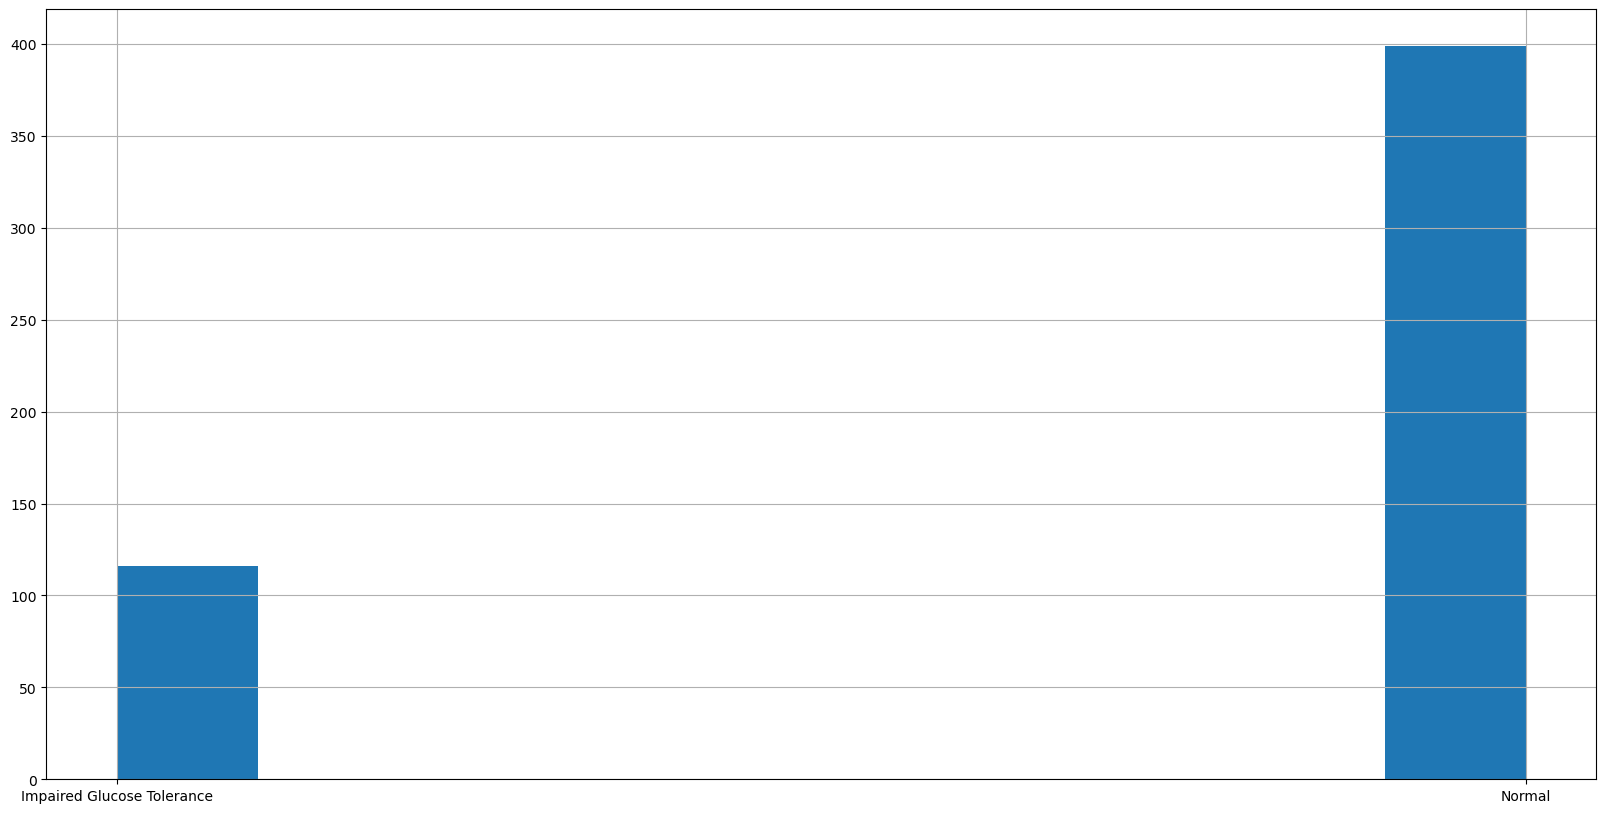

In [64]:
diabetic_count = (df['OGTT_tier'] == 'Diabetic Level').sum()
print("Number of Diabetic Individuals:",diabetic_count)
df["OGTT_tier"].hist(figsize=(20, 10))

### 25. Out of those who categorized as “Impaired Glucose Tolerance”, how many of them are actually diabetes? What about those with “Normal” OGTT_tier?  

In [65]:
impaired_glucose_diabetic_count = df[(df['OGTT_tier'] == 'Impaired Glucose Tolerance') & (df['Outcome'] == 1)].shape[0]

normal_ogtt_diabetic_count = df[(df['OGTT_tier'] == 'Normal') & (df['Outcome'] == 1)].shape[0]

print("Number of individuals with 'Impaired Glucose Tolerance' and diabetes:", impaired_glucose_diabetic_count)
print("Number of individuals with 'Normal' OGTT_tier and diabetes:", normal_ogtt_diabetic_count)

Number of individuals with 'Impaired Glucose Tolerance' and diabetes: 79
Number of individuals with 'Normal' OGTT_tier and diabetes: 100


# Section 2:  ( 2021  Tokyo Olympics ) - ( Weighting = 30% )

In this task we work with 2021 Tokyo summer Olympics dataset. This contains the details of over 11,000 athletes, with 47 disciplines, along with 743 Teams taking part in the 2021(2020) Tokyo Olympics. This dataset contains the details of the Athletes, Coaches, Teams participating as well as the Entries by gender. It contains their names, countries represented, discipline, gender of competitors, name of the coaches.

In [30]:
athlete_data = pd.read_excel("Dataset/Athletes.xlsx")
coach_data = pd.read_excel("Dataset/Coaches.xlsx")
gender_data = pd.read_excel("Dataset/EntriesGender.xlsx")
medal_data = pd.read_excel("Dataset/Medals.xlsx")
team_data = pd.read_excel("Dataset/Teams.xlsx")

/Users/ohiozeomiunualex/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
# Let's look at the first few rows for each table

In [198]:
athlete_data.head()


,Name,NOC,Discipline,First_Name
0,AALERUD Katrine,Norway,Cycling Road,Katrine
1,ABAD Nestor,Spain,Artistic Gymnastics,Nestor
2,ABAGNALE Giovanni,Italy,Rowing,Giovanni
3,ABALDE Alberto,Spain,Basketball,Alberto
4,ABALDE Tamara,Spain,Basketball,Tamara


In [32]:
coach_data.head()

,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN


In [33]:
gender_data.head()


,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


In [34]:
medal_data.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [35]:
team_data.head()

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


### 1. Which countries do most athletes come from? Plot a descendingly ordered bar plot to show athletes counts based on their country of origin? 

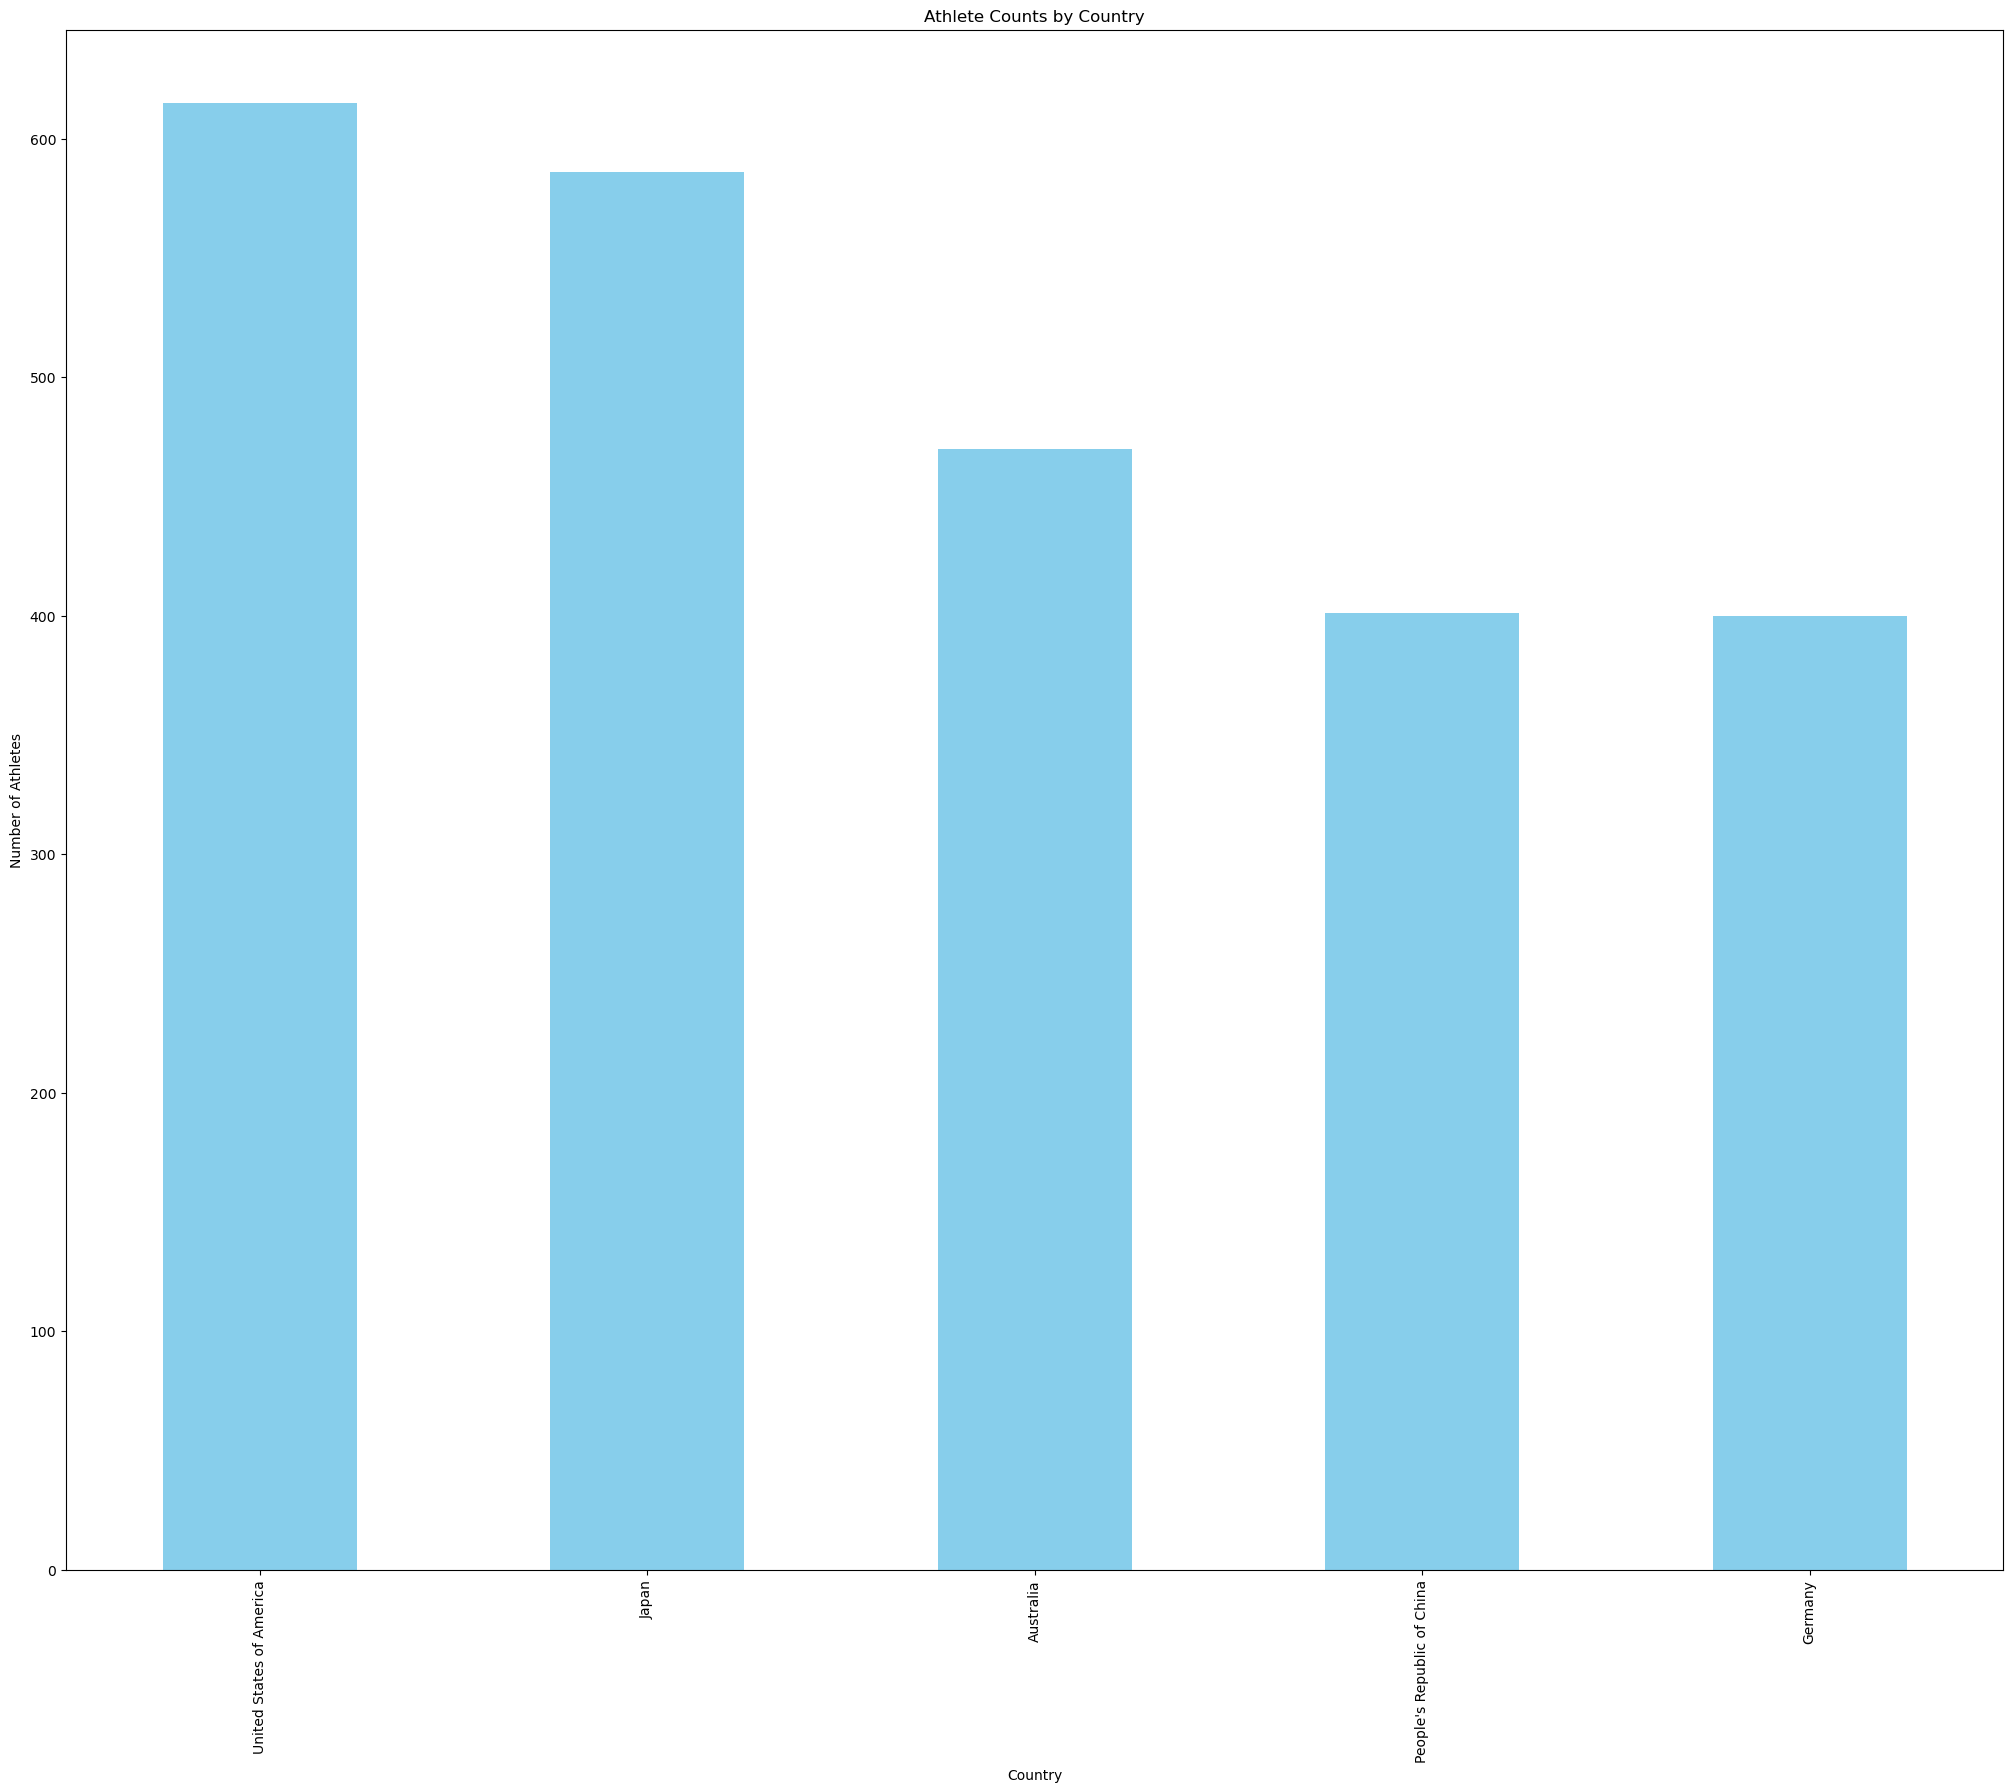

In [235]:
# Extracting the top 5 countries with the highest number of athletes
athlete_counts = athlete_data['NOC'].value_counts()[0:5]

# Creating a figure with a specified size
plt.figure(figsize=(25, 20))

# Sorting the athlete counts in descending order and plotting a bar chart
athlete_counts.sort_values(ascending=False).plot(kind='bar', color='skyblue')

# Adding a title to the plot
plt.title('Athlete Counts by Country')

# Adding labels to the x and y axes
plt.xlabel('Country')
plt.ylabel('Number of Athletes')

# Adjusting layout for better visualization

# Displaying the plot
plt.show()


### 2. Which country has the most female athletes? Plot a descendingly ordered bar plot to show female athletes counts based on their country of origin?

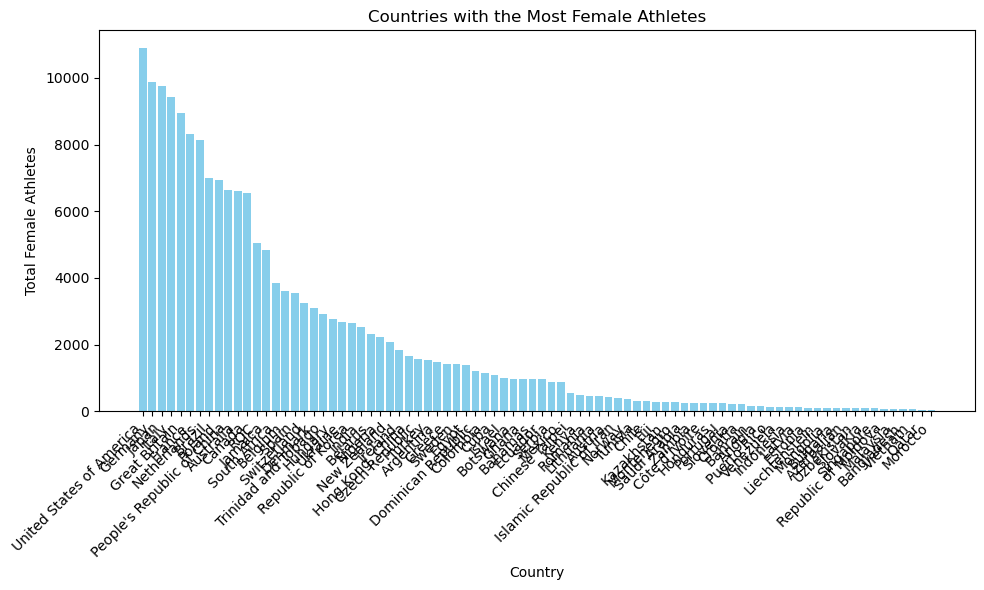

In [232]:
# Merge DataFrames
df = pd.merge(team_data, gender_data, on='Discipline')

# Count female athletes by country
df_grouped = df.groupby('NOC')['Female'].sum().to_frame(name='Total Female Athletes').reset_index()

# Sort by total female athletes in descending order
df_grouped = df_grouped.sort_values(by='Total Female Athletes', ascending=False)

# Plot a descending bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_grouped['NOC'], df_grouped['Total Female Athletes'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Female Athletes')
plt.title('Countries with the Most Female Athletes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### 3. Which country has the least female athletes?

In [215]:


# Merge DataFrames
df = pd.merge(team_data, gender_data, on='Discipline')

# Count female athletes by country
df_grouped = df.groupby('NOC')['Female'].sum().to_frame(name='Total Female Athletes').reset_index()

# Sort by total female athletes in ascending order
df_grouped_least = df_grouped.sort_values(by='Total Female Athletes')

# Get the row with the least female athletes
least_female_athlete_country = df_grouped_least.iloc[0]['NOC']

print(f"The country with the least female athletes is: {least_female_athlete_country}")


The country with the least female athletes is: Qatar


### 4. Which sport is most popular (based on athletes counts)  and which country has the highest participants in it? Plot a descendingly ordered bar plot to show athlete counts in different sports? 

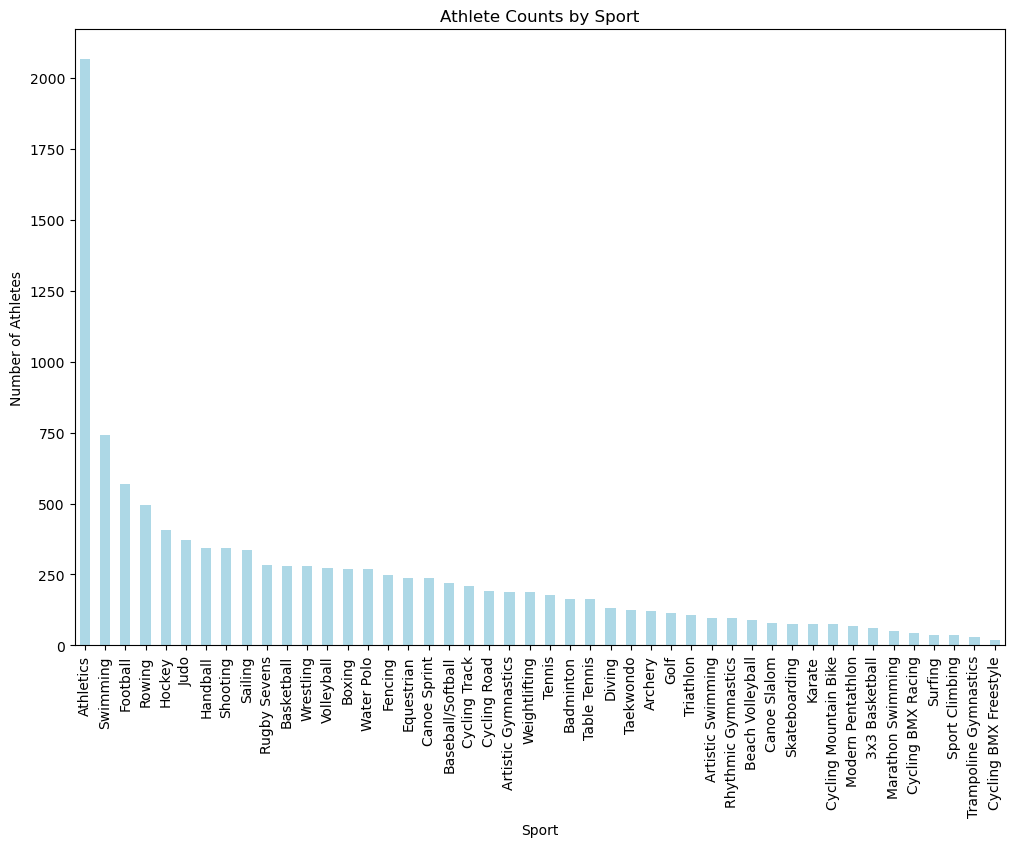

The most popular sport is: Athletics
The country with the highest participants in Athletics is: United States of America


In [37]:
athlete_counts_by_sport = athlete_data['Discipline'].value_counts()

# Plot the descendingly ordered bar plot
plt.figure(figsize=(12, 8))
athlete_counts_by_sport.sort_values(ascending=False).plot(kind='bar', color='lightblue')
plt.title('Athlete Counts by Sport')
plt.xlabel('Sport')
plt.ylabel('Number of Athletes')
plt.show()

# Find the most popular sport and the country with the highest participants in it
most_popular_sport = athlete_counts_by_sport.idxmax()
country_highest_participants = athlete_data[athlete_data['Discipline'] == most_popular_sport]['NOC'].value_counts().idxmax()

print(f"The most popular sport is: {most_popular_sport}")
print(f"The country with the highest participants in {most_popular_sport} is: {country_highest_participants}")

### 5. Plot a descendingly ordered categorical bar plot to show gender segregated athlete counts in different sports.

<Figure size 2500x2000 with 0 Axes>

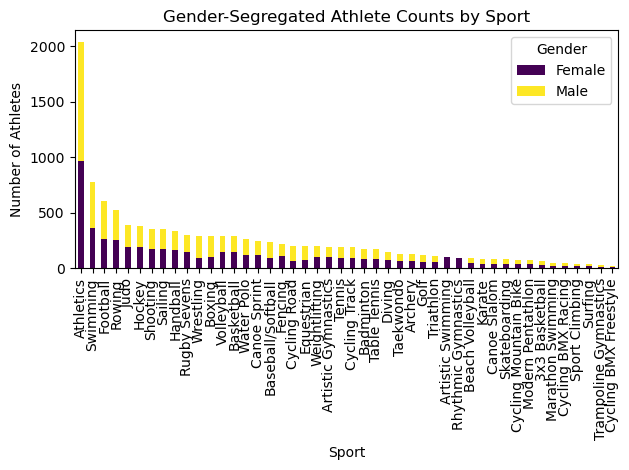

In [38]:
ordered_sports = gender_data.sort_values(by='Total', ascending=False)['Discipline']


plt.figure(figsize=(25, 20))
gender_data.set_index('Discipline').loc[ordered_sports, ['Female', 'Male']].plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Gender-Segregated Athlete Counts by Sport')
plt.xlabel('Sport')
plt.ylabel('Number of Athletes')
plt.legend(title='Gender', loc='upper right')
plt.tight_layout()
plt.show()

### 6. Which sport has they highest proportion of male to female athletes? Plot a descendingly ordered bar plot to depict male to female athletes proportion across different sports.

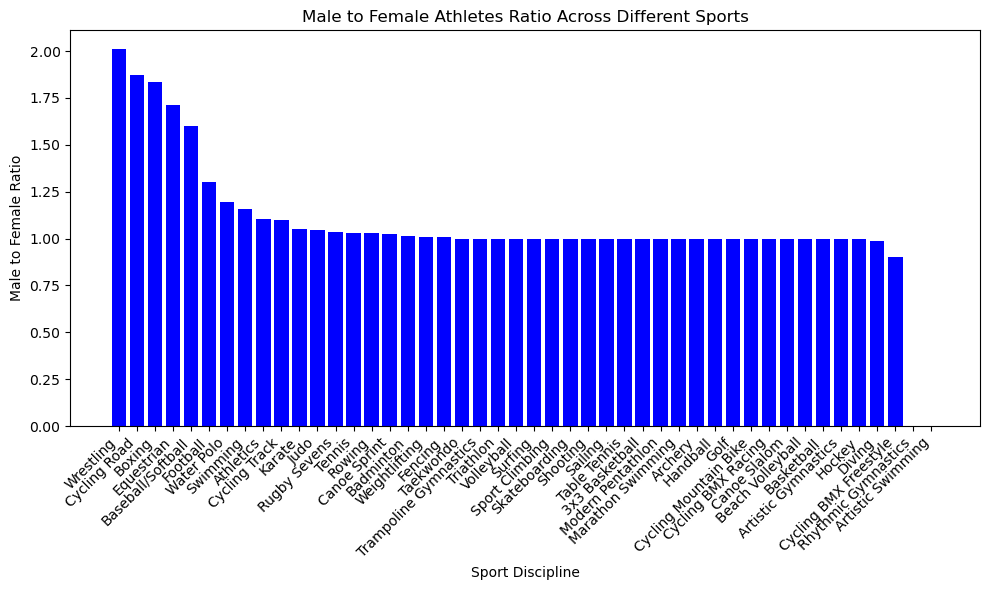

In [25]:

# Calculate the proportion of male to female athletes for each sport
gender_data['Male_to_Female_Ratio'] = gender_data['Male'] / gender_data['Female']

# Sort the DataFrame by the male to female ratio in descending order
df_sorted = gender_data.sort_values(by='Male_to_Female_Ratio', ascending=False)

# Plot a bar plot
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['Discipline'], df_sorted['Male_to_Female_Ratio'], color='blue')
plt.xlabel('Sport Discipline')
plt.ylabel('Male to Female Ratio')
plt.title('Male to Female Athletes Ratio Across Different Sports')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 7. Which country recieved most gold medals? Which recieved most silver and most bronze? Which received least for each? Use bar plot to for illustration.  

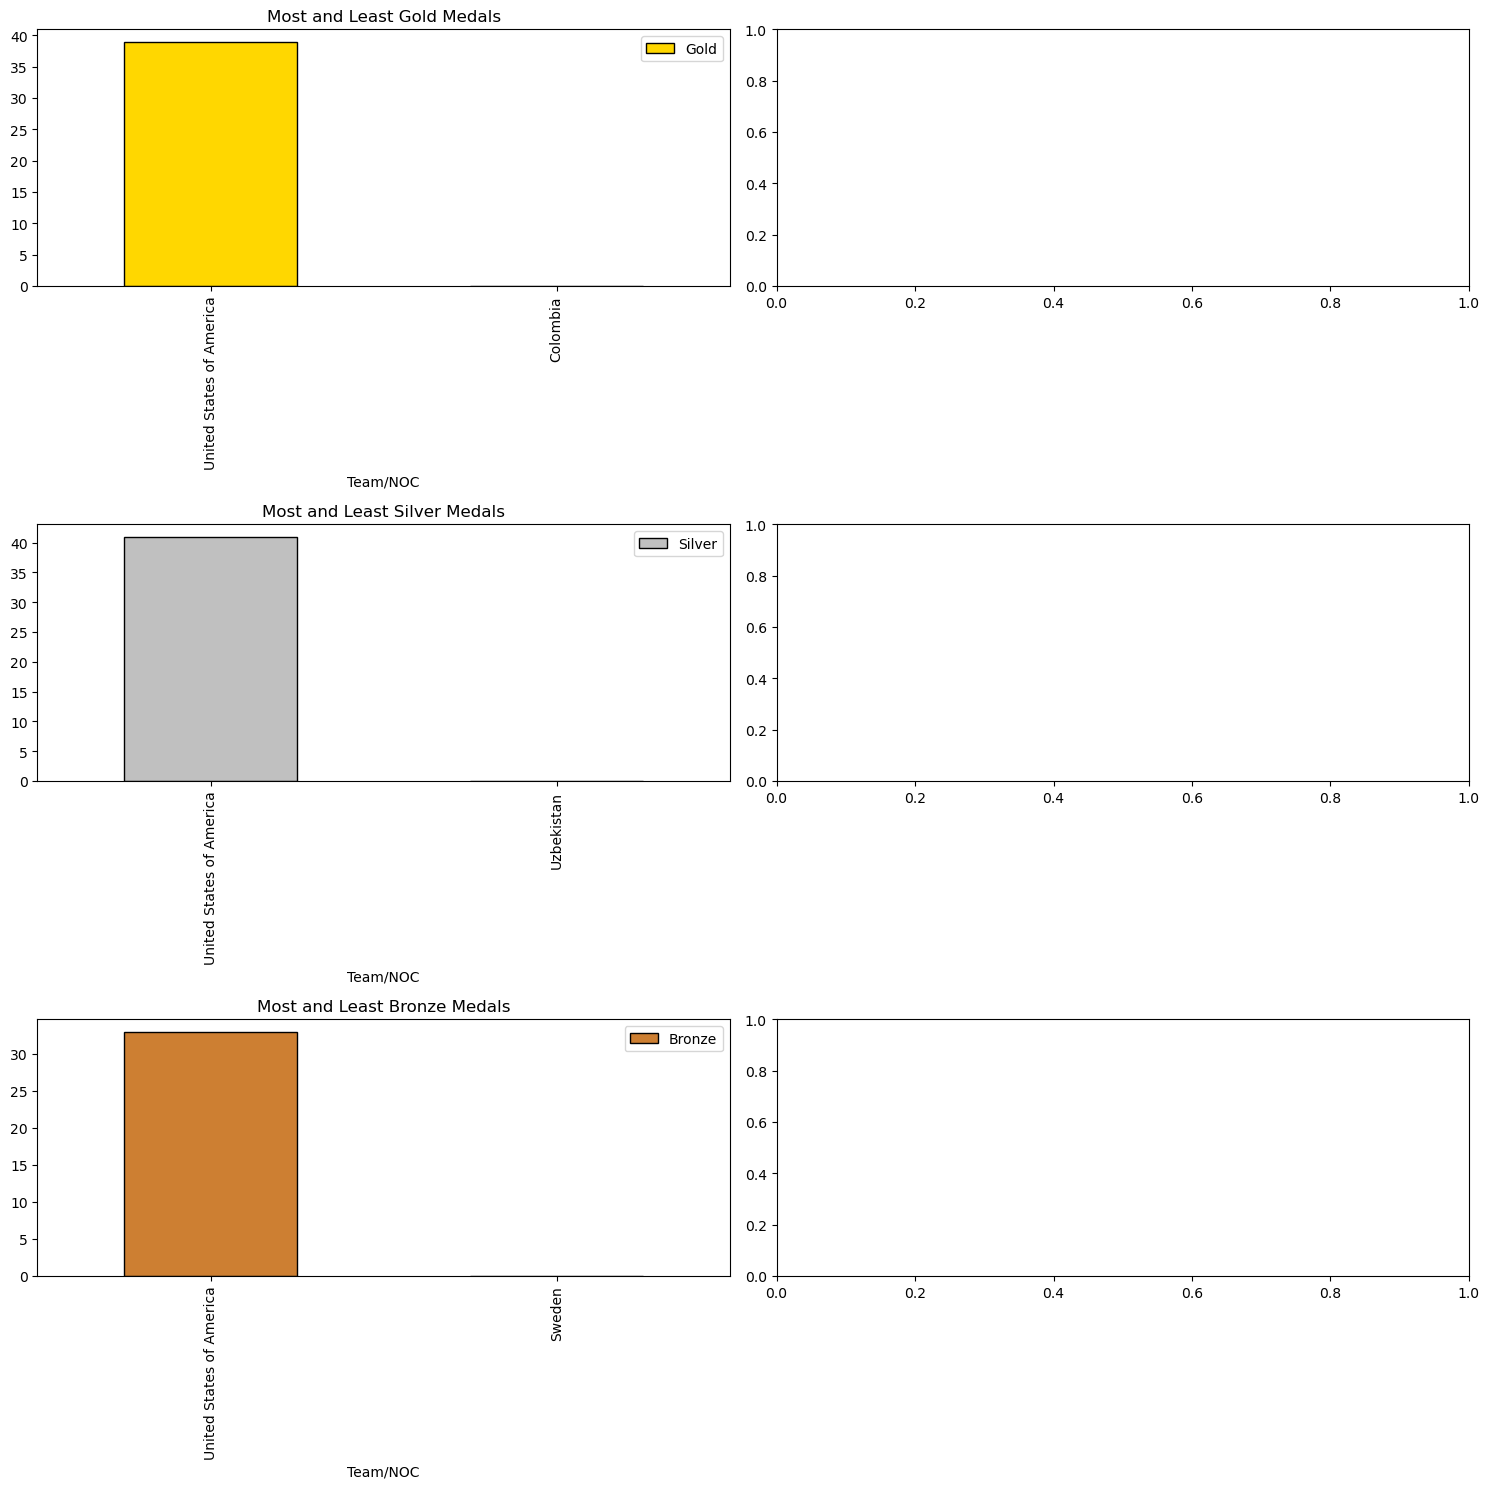

1) Country with most gold medals: United States of America
2) Country with most silver medals: United States of America
3) Country with most bronze medals: United States of America
4) Country with least gold medals: Colombia
5) Country with least silver medals: Uzbekistan
6) Country with least bronze medals: Sweden


In [40]:
# Set 'Team/NOC' as index
medal_data.set_index('Team/NOC', inplace=True)

# Find countries with most and least gold, silver, and bronze medals
most_gold = medal_data['Gold'].idxmax()
most_silver = medal_data['Silver'].idxmax()
most_bronze = medal_data['Bronze'].idxmax()
least_gold = medal_data['Gold'].idxmin()
least_silver = medal_data['Silver'].idxmin()
least_bronze = medal_data['Bronze'].idxmin()

# Plotting
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Most and Least Gold Medals
medal_data[['Gold']].loc[[most_gold, least_gold]].plot(kind='bar', ax=axes[0, 0], color=['gold', 'darkorange'], edgecolor='black')
axes[0, 0].set_title('Most and Least Gold Medals')

# Most and Least Silver Medals
medal_data[['Silver']].loc[[most_silver, least_silver]].plot(kind='bar', ax=axes[1, 0], color=['silver', 'darkgray'], edgecolor='black')
axes[1, 0].set_title('Most and Least Silver Medals')

# Most and Least Bronze Medals
medal_data[['Bronze']].loc[[most_bronze, least_bronze]].plot(kind='bar', ax=axes[2, 0], color=['#cd7f32', 'sienna'], edgecolor='black')
axes[2, 0].set_title('Most and Least Bronze Medals')


plt.tight_layout()
plt.show()

# Print the answers
print(f"1) Country with most gold medals: {most_gold}")
print(f"2) Country with most silver medals: {most_silver}")
print(f"3) Country with most bronze medals: {most_bronze}")
print(f"4) Country with least gold medals: {least_gold}")
print(f"5) Country with least silver medals: {least_silver}")
print(f"6) Country with least bronze medals: {least_bronze}")

### 8. Which country has the highest number of medals (Gold – Silver- Bronze) per capita (participants)? 

In [51]:
# Rename 'Team/NOC' to 'NOC'
medal_data.index.name = "NOC"
# Merge dataframes on NOC
merged_data = pd.merge(athlete_data, medal_data, on='NOC', how='inner')

# Calculate total medals
merged_data['Total Medals'] = merged_data['Gold'] + merged_data['Silver'] + merged_data['Bronze']

# Calculate number of participants per country
participants_count = merged_data.groupby('NOC')['Name'].nunique()

# Calculate ratio of total medals to participants
merged_data['Medals per Participant'] = merged_data['Total Medals'] / merged_data['NOC'].map(participants_count)
# Find the country with the highest ratio
highest_ratio_country = merged_data.loc[merged_data['Medals per Participant'].idxmax(), 'NOC']


print(f"The country with the highest number of medals per capita is: {highest_ratio_country}")


The country with the highest number of medals per capita is: San Marino


### 9. List countries with no medals? 

In [55]:
# Identify countries with no medals
countries_with_no_medals = medal_data[medal_data['Total'] == 0]

print("Countries with no medals:")

if not countries_with_no_medals.empty:
    print(countries_with_no_medals)
else:
    print("All countries have medals.")


Countries with no medals:
All countries have medals.


### 10. Which country had the greatest number of coaches. Plot a descendingly ordered bar plot to show coach counts in different countries. 

<Axes: xlabel='NOC'>

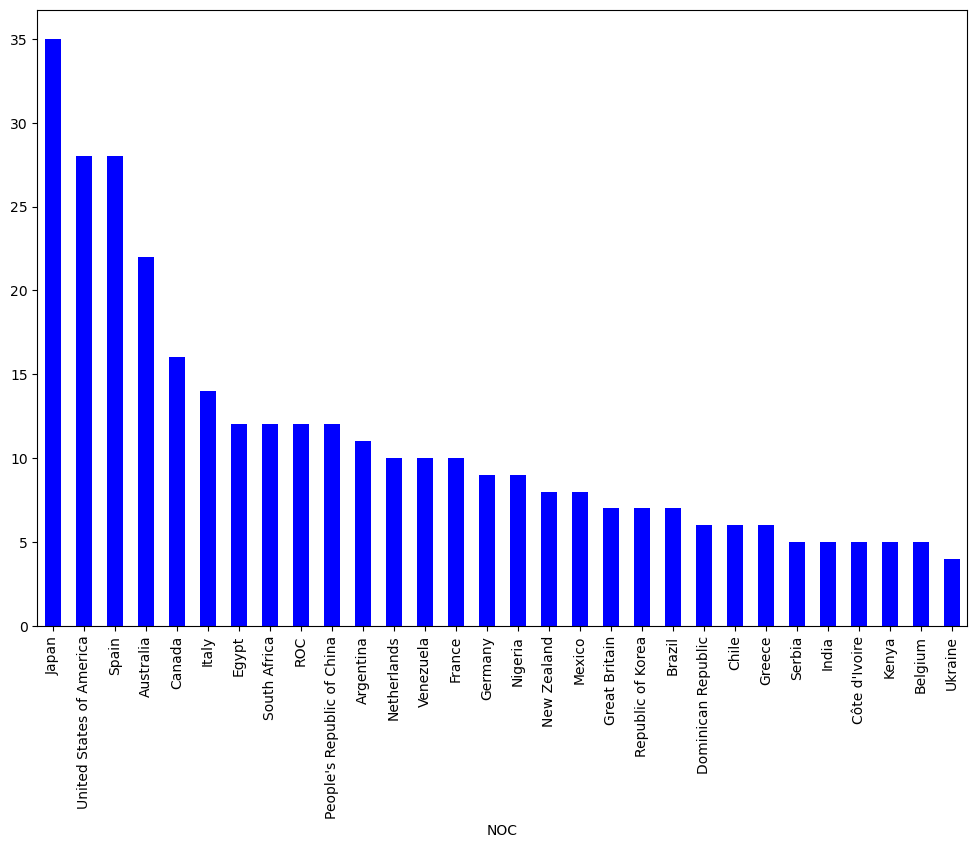

In [56]:

coach_by_country = coach_data['NOC'].value_counts()[0:30]
coach_by_country
# Plot the descendingly ordered bar plot
plt.figure(figsize=(12, 8))
coach_by_country.sort_values(ascending=False).plot(kind='bar', color='blue')

### 11. Plot a descendingly ordered bar plot to show coach counts across different sports.  

<Axes: xlabel='Discipline'>

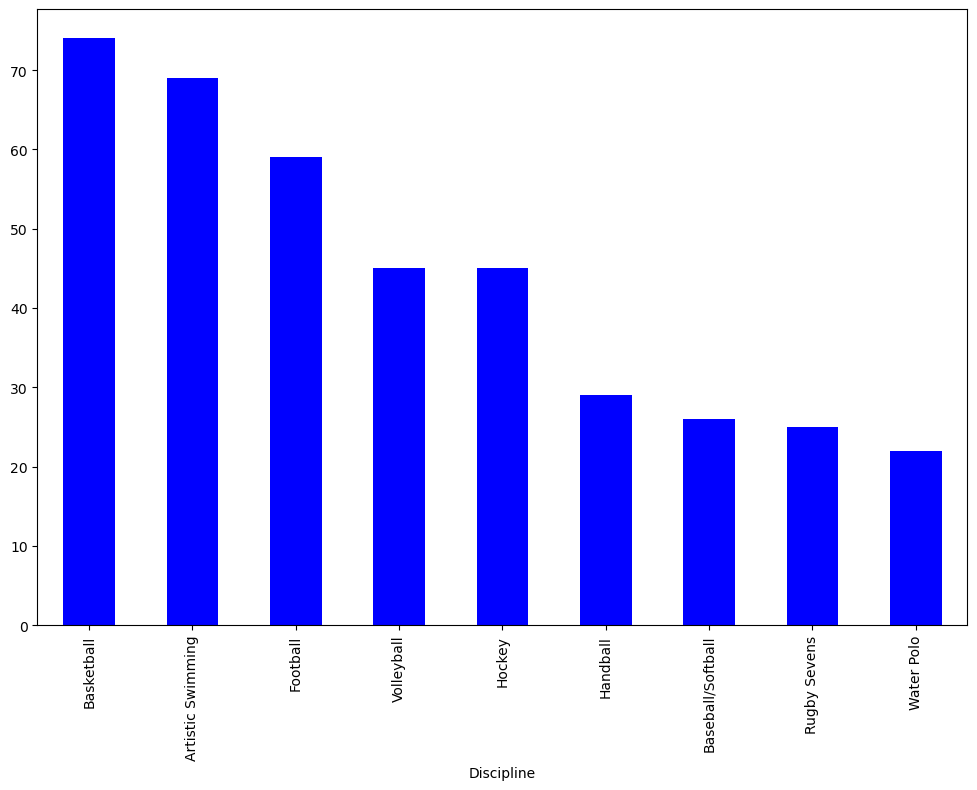

In [57]:
coach_by_discipline = coach_data['Discipline'].value_counts()
coach_by_discipline
# Plot the descendingly ordered bar plot
plt.figure(figsize=(12, 8))
coach_by_discipline.sort_values(ascending=False).plot(kind='bar', color='blue')

### 12. Identify the most popular coach, female and male athlete first name? 

In [58]:


coach_data['First_Name'] = coach_data['Name'].str.split(" ").str[-1]
athlete_data['First_Name'] = athlete_data['Name'].str.split(" ").str[-1]


# Count the occurrences of each first name
coach_first_name_counts = coach_data['First_Name'].value_counts()
athlete_first_name_counts = athlete_data['First_Name'].value_counts()

# # Find the most popular first name for coaches
most_popular_first_name_coach = coach_first_name_counts.idxmax()

# # Find the most popular first name for Athletes
most_popular_first_name_athlete = athlete_first_name_counts.idxmax()


print("The Most popular coach name is :")
print(most_popular_first_name_coach)
print("The Most popular athlete name is :")
print(most_popular_first_name_athlete)


The Most popular coach name is :
Jose
The Most popular athlete name is :
Anna


# Section 3:  ( Show Analysis ) - ( Weighting = 20% )

based on the provided show dataset, please answer the following questions: 

### 1. Import the dataset in to your workspace as a data frame

In [168]:
df = pd.read_csv("Dataset/show.csv")
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


### 2. Removed all duplicates and perform normal cleaning procedure if needed.

In [188]:
df.dropna(axis=1)
#Drop all rows with Not Given
df = df[~df.isin(['Not Given']).any(axis=1)]

### 3. Changing datatype of date_added column to datetime so you can conduct time based analysis

In [183]:
# Convert 'date_added' to datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,day_added,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,Saturday,September,2021
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Friday,September,2021
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",Friday,September,2021
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Wednesday,September,2021
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Friday,September,2021


### 4. Create 3 separate columns for week-day, month, and year based on the date_added column and name them month_added,	year_added, and	day_added respectively. 

In [184]:
df['day_added'] = df['date_added'].dt.day_name()
df['month_added'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year
df.head()


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,day_added,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,Saturday,September,2021
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Friday,September,2021
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",Friday,September,2021
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Wednesday,September,2021
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Friday,September,2021


### 5. Group shows by their type and display the frequency of each type. Also, use a piechart to display show type percentage.

Frequency of Each Show Type:
type
Movie      5696
TV Show     219
Name: count, dtype: int64


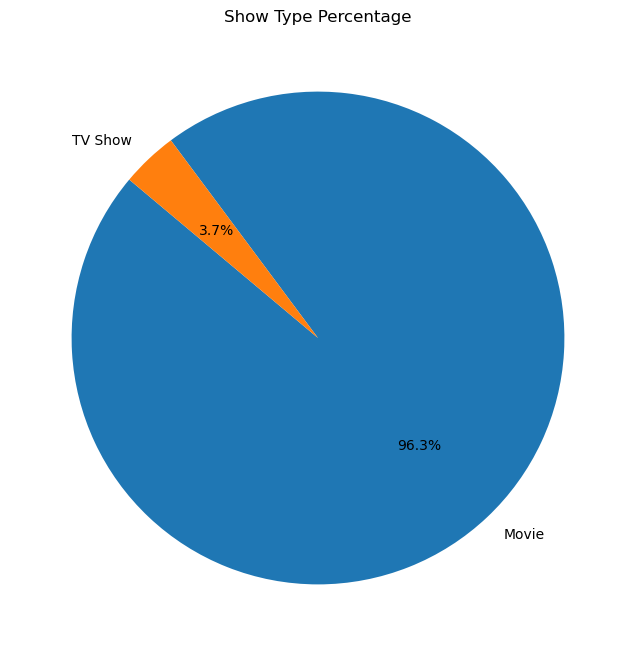

In [185]:
type_frequency = df['type'].value_counts()

print("Frequency of Each Show Type:")
print(type_frequency)

plt.figure(figsize=(8, 8))
plt.pie(type_frequency, labels=type_frequency.index, autopct='%1.1f%%', startangle=140)
plt.title('Show Type Percentage')
plt.show()

### 6. Display the number of shows that each director has ever directed along with the show type. 

In [186]:
director_show_count = df.groupby(['director', 'type']).size().reset_index(name='show_count')

# Display the result
print("Number of Shows Directed by Each Director:")
director_show_count

Number of Shows Directed by Each Director:


,director,type,show_count
0,A. L. Vijay,Movie,2
1,A. Raajdheep,Movie,1
2,A. Salaam,Movie,1
3,A.R. Murugadoss,Movie,2
4,Aadish Keluskar,Movie,1
...,...,...,...
4333,Çagan Irmak,Movie,1
4334,Ísold Uggadóttir,Movie,1
4335,Óskar Thór Axelsson,Movie,1
4336,Ömer Faruk Sorak,Movie,2


### 7. Display the top 10 most active directors. 

In [189]:
director_show_count = df['director'].value_counts().reset_index(name='show_count').rename(columns={'index': 'director'})

# Display the top 10 most active directors
top_10_directors = director_show_count.head(10)
print("Top 10 Most Active Directors:")
top_10_directors

Top 10 Most Active Directors:


,director,show_count
0,Rajiv Chilaka,20
1,Alastair Fothergill,18
2,"Raúl Campos, Jan Suter",18
3,Marcus Raboy,16
4,Suhas Kadav,16
5,Jay Karas,14
6,Cathy Garcia-Molina,13
7,Martin Scorsese,12
8,Jay Chapman,12
9,Youssef Chahine,12


### 8. Group shows based on country and type. Display their frequency too. 

In [211]:
country_type_frequency = df.groupby(['country', 'type']).size().reset_index(name='show_count')
print(country_type_frequency)

          country     type  show_count
0       Argentina    Movie          56
1       Argentina  TV Show           2
2       Australia    Movie          61
3       Australia  TV Show           1
4         Austria    Movie           8
..            ...      ...         ...
101       Uruguay    Movie           8
102     Venezuela    Movie           2
103       Vietnam    Movie           7
104  West Germany    Movie           1
105      Zimbabwe    Movie           1

[106 rows x 3 columns]


### 9. Identify countries with the highest number of show production (top 10). Display their show production frequency too. Beside table, use bar plot to articulate your findings.

Top 10 Countries with the Highest Show Production:
          country  show_production
0   United States             2401
1           India              975
2  United Kingdom              406
3          Canada              189
4          France              156
5           Spain              140
6           Egypt              107
7         Nigeria              100
8           Japan               96
9          Mexico               93


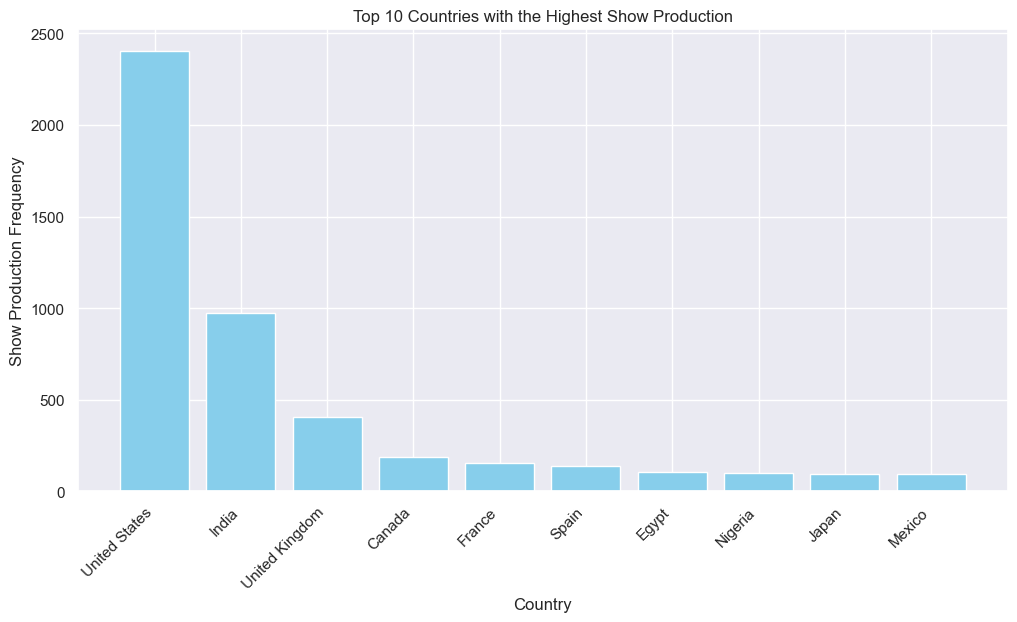

In [213]:


country_show_frequency = df['country'].value_counts().reset_index(name='show_production').rename(columns={'index': 'country'})

top_10_countries = country_show_frequency.head(10)
print("Top 10 Countries with the Highest Show Production:")

print(top_10_countries)

plt.figure(figsize=(12, 6))
plt.bar(top_10_countries['country'], top_10_countries['show_production'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Show Production Frequency')
plt.title('Top 10 Countries with the Highest Show Production')
plt.xticks(rotation=45, ha='right')
plt.show()


### 10. Group shows based on the listed_in (genre) feature. Display their frequency too.

In [215]:


# I Splitted the 'listed_in' column to handle multiple genres in a single entry
df['genres'] = df['listed_in'].apply(lambda x: x.split(', '))

# Explode the genres to create a separate row for each genre
df_exploded = df.explode('genres')

# Group by genre and calculate the frequency
genre_frequency = df_exploded['genres'].value_counts().reset_index(name='show_count').rename(columns={'index': 'genre'})

# Display the frequency of shows based on genre
print("Frequency of Shows Based on Genre:")
genre_frequency

Frequency of Shows Based on Genre:


,genres,show_count
0,International Movies,2558
1,Dramas,2330
2,Comedies,1593
3,Action & Adventure,815
4,Documentaries,762
5,Independent Movies,742
6,Romantic Movies,588
7,Children & Family Movies,559
8,Thrillers,558
9,Horror Movies,344


### 11. Identify the top 10 most popular genre based on the listed_in feature.

In [219]:
df['genres'] = df['listed_in'].apply(lambda x: x.split(', '))

df_exploded = df.explode('genres')
genre_frequency = df_exploded['genres'].value_counts().reset_index(name='show_count').rename(columns={'index': 'genre'})
print("Top 10 most popular genre:")
genre_frequency[0:10]

Top 10 most popular genre:


,genres,show_count
0,International Movies,2558
1,Dramas,2330
2,Comedies,1593
3,Action & Adventure,815
4,Documentaries,762
5,Independent Movies,742
6,Romantic Movies,588
7,Children & Family Movies,559
8,Thrillers,558
9,Horror Movies,344


### 12. Use line plot to display show frequency per year segregated by show type. 

<Figure size 1200x600 with 0 Axes>

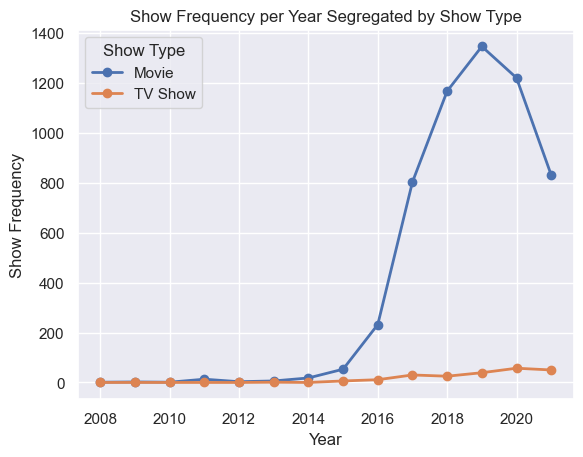

In [220]:
df['date_added'] = pd.to_datetime(df['date_added'])

df['year_added'] = df['date_added'].dt.year

year_type_frequency = df.groupby(['year_added', 'type']).size().reset_index(name='show_count')

pivot_table = year_type_frequency.pivot(index='year_added', columns='type', values='show_count').fillna(0)

plt.figure(figsize=(12, 6))
pivot_table.plot(kind='line', marker='o', linewidth=2)
plt.title('Show Frequency per Year Segregated by Show Type')
plt.xlabel('Year')
plt.ylabel('Show Frequency')
plt.legend(title='Show Type')
plt.grid(True)
plt.show()

# Section 4:  Analysing Financial Times Stock Exchange 100 Index.
# ( Weighting = 20% )

For this project, you need to upload the file `FTSE100.csv` to Colab.

To do this, look at the menu on the left - there is a list of folders and files you have available. Right click on the sample_data folder and choose "Upload".

Once uploaded, the file should show up the Files structure on the right hand side tab.

Once uploaded, the file path should be  `sample_data/FTSE100.csv`.

Create a dataframe `df` from the CSV file `FTSE100.csv` you just uploaded:


In [92]:
df = pd.read_csv("Dataset/FTSE100.csv")
df.head()

,Company,Shares,Ticker,Sector,Mid-price (p),Change,Our view,Brokers,Strong Buy,Buy,Neutral,Sell,Strong Sell,Recommendation
0,3i,4812,III,Financial Services,"1,099.50",0.0171,Hold,5,NaN,4,1,0,0,Buy
1,Admiral Group,1309,ADM,Nonlife Insurance,"2,115.00",-0.42%,Hold,18,NaN,2,6,7,3,Underweight
2,Anglo American plc,5349,AAL,Mining,"1,744.00",0.0154,Hold,24,NaN,15,6,2,0,Buy
3,Antofagasta,3940,ANTO,Mining,848.2,0.0326,Hold,21,NaN,8,9,3,0,Overweight
4,Ashtead Group,9769,AHT,Support Services,"2,207.00",0.0347,Buy,17,NaN,12,5,0,0,Buy


The dataframe contains 101 rows and 13 different columns.

## **Q1** 

Create a function `tidy_rows` that drops any rows in the DataFrame where the Ticker column is equal to given ticker string value `ticker`.

* No other rows should be added or removed
* No columns should be changed
* The order of the columns and rows should be unchanged





In [63]:
def tidy_rows(df, ticker):
    """
    :type df: pd.DataFrame
    :param df: a DataFrame to be processed
    :type ticker: str
    :param ticker: a stock ticker code
    :return: modified DataFrame
    :rtype: pd.DataFrame
    """
    df_filtered = df[df['Ticker'] != ticker]
    return df_filtered

Feel free to test your function with ticker set to `CCL`. Your new dataframe should now have 100 rows.

In [64]:
ticker = 'CCL'
df_drop_ticker = tidy_rows(df, ticker)
df_drop_ticker

,Company,Shares,Ticker,Sector,Mid-price (p),Change,Our view,Brokers,Strong Buy,Buy,Neutral,Sell,Strong Sell,Recommendation
0,3i,4812,III,Financial Services,"1,099.50",0.0171,Hold,5,NaN,4,1,0,0,Buy
1,Admiral Group,1309,ADM,Nonlife Insurance,"2,115.00",-0.42%,Hold,18,NaN,2,6,7,3,Underweight
2,Anglo American plc,5349,AAL,Mining,"1,744.00",0.0154,Hold,24,NaN,15,6,2,0,Buy
3,Antofagasta,3940,ANTO,Mining,848.2,0.0326,Hold,21,NaN,8,9,3,0,Overweight
4,Ashtead Group,9769,AHT,Support Services,"2,207.00",0.0347,Buy,17,NaN,12,5,0,0,Buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Unilever,270,ULVR,Personal Goods,"5,151.00",0.0029,Buy,16,NaN,6,6,2,1,Overweight
97,United Utilities,7788,UU.,"Gas, Water & Multi-utilities",808,0.0025,Buy,12,NaN,4,4,1,2,Overweight
98,Vodafone Group,5290,VOD,Mobile Telecommunications,155.88,0.0203,Buy,20,NaN,14,3,1,0,Buy
99,Whitbread,8239,WTB,Retail hospitality,"4,357.00",0.0035,Hold,22,NaN,3,12,3,3,Neutral


## **Q2** 

Create a function `tidy_columns` that drops any columns in the DataFrame where the column name is equal to a given value set by the variable 'column'. It's important to first ensure that the DataFrame contains the column passed.

* No other columns should be changed
* No rows should be added or removed
* The order of the columns and rows should be unchanged




In [65]:
def tidy_columns(df, column):
    """
    :type df: pd.DataFrame
    :param df: a DataFrame to be processed
    :type column: str
    :param column: the name of a column in df
    :return: modified DataFrame
    :rtype: pd.DataFrame
    """
    if column in df.columns:
        df = df.drop(columns=[column])
    return df
    


Test your function by passing the variable column set to `Strong Sell`.

In [66]:
column = 'Strong Sell'
df_drop_columns = tidy_columns(df, column)
df_drop_columns

,Company,Shares,Ticker,Sector,Mid-price (p),Change,Our view,Brokers,Strong Buy,Buy,Neutral,Sell,Recommendation
0,3i,4812,III,Financial Services,"1,099.50",0.0171,Hold,5,NaN,4,1,0,Buy
1,Admiral Group,1309,ADM,Nonlife Insurance,"2,115.00",-0.42%,Hold,18,NaN,2,6,7,Underweight
2,Anglo American plc,5349,AAL,Mining,"1,744.00",0.0154,Hold,24,NaN,15,6,2,Buy
3,Antofagasta,3940,ANTO,Mining,848.2,0.0326,Hold,21,NaN,8,9,3,Overweight
4,Ashtead Group,9769,AHT,Support Services,"2,207.00",0.0347,Buy,17,NaN,12,5,0,Buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Unilever,270,ULVR,Personal Goods,"5,151.00",0.0029,Buy,16,NaN,6,6,2,Overweight
97,United Utilities,7788,UU.,"Gas, Water & Multi-utilities",808,0.0025,Buy,12,NaN,4,4,1,Overweight
98,Vodafone Group,5290,VOD,Mobile Telecommunications,155.88,0.0203,Buy,20,NaN,14,3,1,Buy
99,Whitbread,8239,WTB,Retail hospitality,"4,357.00",0.0035,Hold,22,NaN,3,12,3,Neutral


## **Q3** 
Create a function `convert_to_float` that converts the values of a given column from strings into floats.

* Note that the strings may include a comma `,` (e.g. `1,000`) which will need to be removed
* The order of the columns and rows should be unchanged

In [232]:
def convert_to_float(df, column):
    """
    :type df: pd.DataFrame
    :param df: a DataFrame to be processed
    :type column: str
    :param column: the name of a column in df
    :return: modified DataFrame
    :rtype: pd.DataFrame
    """
    if column in df.columns:
        # Remove commas and convert the values to float
        df[column] = df[column].replace(',', '', regex=True).astype(float)
    
    return df

Test your function on the column `Mid-price (p)`:

In [233]:
print('Type of column Mid-price (p) in df_test_conversion:', df['Mid-price (p)'].dtype)
df_midprice_as_float = convert_to_float(df, 'Mid-price (p)')
print('Type of column Mid-price (p) in df_midprice_as_float:', df_midprice_as_float['Mid-price (p)'].dtype)

Type of column Mid-price (p) in df_test_conversion: object
Type of column Mid-price (p) in df_midprice_as_float: float64


## **Q4** 
Create a function `format_percentage_change` that converts a poorly formatted string representing a percentage into a float. 

Specifically, ensure that any '%' symbols are removed and the string is converted to a float.
* If the float is positive, multiply it by 100
* Ensure that the returned float is in decimal form (e.g. 0.99% -> 99.0)


In [234]:
def format_percentage_change(string):
    """
    :type string: str
    :param string: a string representing a percentage
    :return: modified string
    :rtype: float
    """
    percentage_float = float(string.replace('%', '').strip())
    if percentage_float > 0:
        percentage_float *= 100.0
    return percentage_float
    


Test your function with an example `test_string = '-0.49%'`

In [11]:
test_string = '-0.49%'
print(test_string)
print(format_percentage_change(test_string))

-0.49%
-0.49


## **Q5** 
Create a function `holding_summary` that takes as input a df and a tuple `holding` containing a company ticker code, the number of shares, and the price paid (in pence). 

Use the function 'convert_to_float()' to convert the "Mid-price (p)" column to floats, then return a dictionary containing the following keys and values:

    - holding_cost: float, # The cost (in £) of the holding (#shares x price paid)
    - holding_value: float, # The value (in £) of the holding (#shares x current mid-price)
    - change_in_value: float, # The % change from the original price paid to the current price

In [239]:
def holding_summary(df, holding):
    """
    :type df: pd.DataFrame
    :param df: a DataFrame containing price information relevant to the holding
    :type holding: tuple
    :param holding: a tuple containing the ticker code, the number of shares, the price paid
    :return: dictionary with the three keys above and the values as floats
    :rtype: dict
    """
    ticker, num_shares, price_paid = holding
    
    df = convert_to_float(df, 'Mid-price (p)')
    
    holding_cost = num_shares * price_paid / 100.0
    
    holding_value = num_shares * df[df['Ticker'] == ticker]['Mid-price (p)'].values[0]
    
    original_value = num_shares * price_paid
    current_value = holding_value
    change_in_value = ((current_value - original_value) / original_value) * 100.0
    
    summary = {
        'holding_cost': holding_cost,
        'holding_value': holding_value,
        'change_in_value': change_in_value
    }
    
    return summary

Test your function using the tuple `holding = ('AZN', 500, 6700.0)`.

Your holding summary should return the following:
```
{'change_in_value': 9.970149253731343,
 'holding_cost': 33500.0,
 'holding_value': 36840.0}
 ```

In [240]:
holding = ('AZN', 500, 6700.0)
holding_summary(df, holding)

{'holding_cost': 33500.0,
 'holding_value': 3684000.0,
 'change_in_value': 9.970149253731343}

## **Q6** 
Create a function `market_comparison` that returns a DataFrame with the following columns added to the input `df`:
    
* `Change (%)`: this should contain the output of your 'format_percentage_change()' function applied to the "Change" column of the input df
* `Beat Market`: this should be a Boolean column containing True for companies where "Change (%)" exceeds the average market change
* `Buy Ratio`: this should equal the "Buy" column divided by the "Brokers" column

It may help to first calculate the average market change (%)

In [241]:
def market_comparison(df):
    """
    :type df: pd.DataFrame
    :param df: a DataFrame to be processed
    :rtype: pd.DataFrame
    """
    df['Change (%)'] = df['Change'].apply(format_percentage_change)
    
    # Calculate the average market change
    avg_market_change = df['Change (%)'].mean()
    
    # Add the "Beat Market" column
    df['Beat Market'] = df['Change (%)'] > avg_market_change
    
    # Add the "Buy Ratio" column
    df['Buy Ratio'] = df['Buy'] / df['Brokers']
    
    return df

Test your function on the FTSE100 `df`. The new dataframe should a  mean buy ration of 0.4274473324766943.

In [243]:
df_market_comparison = market_comparison(df)
df_market_comparison['Buy Ratio'].mean()

0.42744733247669425

## **Q7** 
Create a function `identify_companies` that takes as input a df and a list `watchlist` and returns a list of companies which are in both the watchlist and the df and which match at least one of the following criteria:

* Any company in "watchlist" whose target price is greater than or equal to the current "Mid-price (p)"
* Any company in "watchlist" whose "Buy Ratio" is 0.5 or greater
* Note that the watchlist is a list of tuples. Each tuple contains a string representing a company and a target price. For instance:

        [("Barclays", 135.5), ("AstraZeneca", 750.0), ... ]

In [246]:
def identify_companies(df, watchlist):
    """
    :type df: pd.DataFrame
    :param df: a DataFrame to be processed
    :type watchlist: list
    :param watchlist: list of tuples containing company name and target price
    :rtype: list
    """
    # Create an empty list to store identified companies
    identified_companies = []
    
    # Iterate through the watchlist
    for company, target_price in watchlist:
        # Check if the company is in the DataFrame and matches the criteria
        if company in df['Company'].values:
            # Get the current "Mid-price (p)" for the company
            current_price = df[df['Company'] == company]['Mid-price (p)'].values[0] / 100.0
            
            # Get the "Buy Ratio" for the company
            buy_ratio = df[df['Company'] == company]['Buy Ratio'].values[0]
            
            if target_price >= current_price or buy_ratio >= 0.5:
                identified_companies.append(company)
    
    return identified_companies


Test your function with a watchlist set as 
```
watchlist = [('Imperial Brands', 100.0), ('Aveva', 3900.0)]
```

The returned list should have two companies.


In [247]:
watchlist = [('Imperial Brands', 100.0), ('Aveva', 3900.0)]
companies_list = identify_companies(df, watchlist)
print(companies_list)
print(len(companies_list))

['Imperial Brands', 'Aveva']
2


## **Q8** 
Create a function `sector_performance` which outputs a summary of stock market performance by market sector together with the the sector performance of a private portfolio of shares.

The stock market performance is passed in via a DataFrame which contains the following columns:
* Ticker: the abbreviation used to uniquely identify the company
* Sector: the market sector of the company
* Shares: the number of shares in the stock market index
* Mid-price (p): the price of the shares at the end of the day
* Change: the change in price over the course of the day

The private portfolio information consists of a dictionary whose key:value pairs are ticker: number of shares held in the portfolio for each company. 

Note, that the portfolio does not necessarily hold all of the shares in the index.

The function should return a new DataFrame with the following columns:
* Sector (index column): the market sectors as they appear in the provided DataFrame (string)
* Market Cap %: the percentage of the index represented by that sector, at end of the day (float)
* Sector Return: the return (expressed as a percentage) from the shares in that sector, calculated as an arithmetic average and using Market Cap % as the weights.
* Portfolio %: the percentage of the portfolio in each sector based on prices at the end of the day (float)
* Portfolio Return: the return (expressed as a percentage) from the shares held by the portfolio in each sector

It should be sorted in descending order of Market Cap % and any sectors which are not in the private portfolio should be removed.

In [184]:
def sector_performance(stock_market_df, portfolio_dict):
    """
    :type stock_market_df: pd.DataFrame
    :param stock_market_df: a DataFrame to be processed
    :type portfolio_dict: dict
    :param portfolio_dict: a dictionary with key:value pairs of ticker of a company:number of shares in a portfolio
    :return: a new DataFrame as described above
    :rtype: pd.DataFrame
    """
    #Calculate Market Cap % for each sector
    market_cap = stock_market_df.groupby('Sector')['Shares'].sum()
    market_cap_percentage = (market_cap / market_cap.sum()) * 100

    # Calculate Sector Return for each sector
    stock_market_df['Market Value'] = stock_market_df['Shares'] * stock_market_df['Mid-price (p)']
    stock_market_df['Return'] = (stock_market_df['Change'] + 1) * 100 - 100  # Convert Change to percentage
    sector_return = stock_market_df.groupby('Sector').apply(lambda x: (x['Return'] * x['Market Value']).sum() / x['Market Value'].sum())

    # Calculate Portfolio % and Portfolio Return for each sector
    df_portfolio = stock_market_df[stock_market_df['Ticker'].isin(portfolio_dict.keys())]
    df_portfolio['Market Value'] = df_portfolio['Shares'] * df_portfolio['Mid-price (p)']
    portfolio_percentage = (df_portfolio.groupby('Sector')['Market Value'].sum() / df_portfolio['Market Value'].sum()) * 100
    portfolio_return = df_portfolio.groupby('Sector').apply(lambda x: (x['Return'] * x['Market Value']).sum() / x['Market Value'].sum())

    # Create the output DataFrame
    result_df = pd.DataFrame({
        'Market Cap %': market_cap_percentage,
        'Sector Return': sector_return,
        'Portfolio %': portfolio_percentage,
        'Portfolio Return': portfolio_return
    })

    # Sort by Market Cap % in descending order
    result_df = result_df.sort_values(by='Market Cap %', ascending=False)

    return result_df
    
   



Test your function for the ticker RDSA with 4 shares:
```
dct = {'RDSA': 4}
```

In [191]:
dct = {'RDSA': 4}

sector_performance(df, dct)

/var/folders/q9/xghw_0yd27j577p1m74xhhzm0000gn/T/ipykernel_29418/4164734747.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_portfolio['Market Value'] = df_portfolio['Shares'] * df_portfolio['Mid-price (p)']


,Market Cap %,Sector Return,Portfolio %,Portfolio Return
Sector,,,,
Support Services,10.499362,-1.287184,NaN,NaN
Mining,7.715091,2.184748,NaN,NaN
Food & Drug Retailers,6.145154,-3.526357,NaN,NaN
Life Insurance,6.135406,1.447097,NaN,NaN
Banks,6.113474,-120.368970,NaN,NaN
"Gas, Water & Multi-utilities",6.061362,0.182403,NaN,NaN
Household Goods & Home Construction,6.023683,-6.813901,NaN,NaN
Financial Services,5.146955,1.340209,NaN,NaN
Oil & Gas Producers,4.500798,1.137881,100.0,1.05


## **Q9** 
At the end of the day, the broker sends a list of buy and sell recommendations to clients.  They include the ticker of those companies with a 'buy' recommendation that have fallen in value, and those with a 'sell' recommendation that have risen in value.  In both cases, if there is no change in value, the company ticker is included in the list. Write a function `recommendations` that returns a list for `buy` recommendations and one for `sell` recommendations.

If there are no companies which satisfy a buy or a sell criteria, your function should return the string "There are no Buy recommendations today." and/or "There are no Sell recommendations today." instead of a list.

In the DataFrame provided as a parameter, the column to be used for the recommendation is "Our view".  Note that items in the column can take the values Sell, Buy or Hold, but sometimes the typist uses the wrong case (e.g. he might type SELL, or buy etc).

In [193]:
def recommendations(df):
    """
    :type df: pd.DataFrame
    :param df: a DataFrame to be processed
    :return: 2 lists, one containing the tickers of companies with buy recommendations and the other the tickers of
    those with sell recommendations, as further detailed above. If either list are empty, they should be replaced with
    a sentence (as a string), as detailed above.
    :rtype: Either 2 lists, or a list and a string, or string and a list, or 2 strings
    """
    # Convert the 'Our view' column to lowercase for case-insensitive comparison
    df['Our view'] = df['Our view'].str.lower()
    
    # Ensure the 'Change' column is numeric
    df['Change'] = pd.to_numeric(df['Change'], errors='coerce')
    
    # Get companies with 'buy' recommendations that have fallen or unchanged
    buy_recommendations = df[(df['Our view'] == 'buy') & (df['Change'] <= 0)]['Ticker'].tolist()
    
    # Get companies with 'sell' recommendations that have risen or unchanged
    sell_recommendations = df[(df['Our view'] == 'sell') & (df['Change'] >= 0)]['Ticker'].tolist()
    
    # Format the results based on whether the lists are empty or not
    if buy_recommendations:
        buy_result = buy_recommendations
    else:
        buy_result = "There are no Buy recommendations today."

    if sell_recommendations:
        sell_result = sell_recommendations
    else:
        sell_result = "There are no Sell recommendations today."
    
    return buy_result, sell_result


Test your function on the FTSE 100 df. Your function should return a list of `buy` recommenmdations and the string 'There are no Sell recommendations today.'

In [27]:
recommendations(df)

('There are no Buy recommendations today.',
 'There are no Sell recommendations today.')

## Good Luck!